In [1]:
import pandas as pd
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import random
import copy
import numpy as np
# 전처리 모듈
from preprocess import SV10Preprocess

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
all_csv = ['/STORAGE/SHARE/seokho/SV10_배포용/지도학습/Train_Data/여수_total_real_maritime_trials_final.csv',
 '/STORAGE/SHARE/seokho/SV10_배포용/지도학습/Train_Data/영흥도_total_real_maritime_trials_final.csv']

total = pd.DataFrame()

for csv in tqdm(all_csv):
    temp = pd.read_csv(csv, sep = ',', encoding = 'utf-8')
    total = pd.concat([total, temp])
    total.reset_index(inplace = True)
    total.drop(labels = 'index', axis = 1, inplace = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 57.06it/s]


In [3]:
preprocess = SV10Preprocess()
total = preprocess.ecs_add_feature(total)

In [4]:
ecs = total
ecs.loc[ecs['MaxRisk'] == 0, 'ANSWER'] = 0    # 오류값 전처리
ecs = ecs.drop_duplicates()  # 오류값 전처리 하면 중복값 생김
ecs.reset_index(drop = True, inplace = True)
ecs

,szMsgSendDT,szMsgSeq,os_SHIP_CODE,os_dSOG,os_dCOG,os_dLat,os_dLon,dOsCPADist,dOsCPALat,dOsCPALon,...,szMessage,dRisk,dLat,dLon,dDCPA,dTCPA,lVulCnt,ANSWER,RNG,MaxRisk
0,2.022103e+16,34601.0,TZ010f20,10.4,121.2,34.702265,127.801563,1.343333,34.690467,127.825150,...,진행방향으로부터 12시 방향 2.86마일에서 선박이 11.7노트의 속도로 접근 중입니다.,86.0,34.689661,127.824396,0.122197,7.757654,1.0,0,2.859705,44.0
1,2.022103e+16,34602.0,TZ010f1e,11.4,314.4,34.670835,127.844853,1.485167,34.688154,127.823445,...,진행방향으로부터 12시 방향 2.83마일에서 선박이 10.4노트의 속도로 접근 중입니다.,86.0,34.689248,127.824422,0.163090,7.830188,1.0,0,2.830856,44.0
2,2.022103e+16,34603.0,TZ010f20,11.5,117.0,34.702172,127.801785,1.434306,34.691126,127.828034,...,진행방향으로부터 12시 방향 2.83마일에서 선박이 11.0노트의 속도로 접근 중입니다.,86.0,34.688548,127.825942,0.372302,7.484357,0.0,0,2.834945,43.0
3,2.022103e+16,34604.0,TZ010f1e,10.8,309.6,34.670972,127.844662,1.344000,34.685250,127.823769,...,진행방향으로부터 12시 방향 2.80마일에서 선박이 11.6노트의 속도로 접근 중입니다.,86.0,34.687594,127.825658,0.337835,7.481323,0.0,0,2.803469,44.0
4,2.022103e+16,34606.0,TZ010f20,11.2,129.8,34.701988,127.802102,1.347111,34.687351,127.823372,...,진행방향으로부터 12시 방향 2.80마일에서 선박이 11.8노트의 속도로 접근 중입니다.,86.0,34.686446,127.822531,0.136890,7.223421,0.0,0,2.796682,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,2.022093e+16,83925.0,TZ010f1e,5.7,47.1,37.215032,126.474068,0.026917,37.215337,126.474479,...,진행방향으로부터 4시 방향 0.03마일에서 선박이 11.4노트의 속도로 접근 중입니다.,93.0,37.215287,126.474656,0.017955,0.289492,2.0,3,0.034437,93.0
11855,2.022093e+16,83926.0,TZ010f1f,11.5,34.4,37.214515,126.474280,0.044722,37.215218,126.474882,...,진행방향으로부터 10시 방향 0.03마일에서 선박이 6.1노트의 속도로 접근 중입니다.,93.0,37.215276,126.474705,0.018265,0.248733,2.0,3,0.034710,93.0
11856,2.022093e+16,83927.0,TZ010f1e,6.1,51.8,37.215118,126.474200,0.020333,37.215328,126.474533,...,진행방향으로부터 3시 방향 0.03마일에서 선박이 11.5노트의 속도로 접근 중입니다.,93.0,37.215269,126.474715,0.018811,0.212481,2.0,3,0.028127,93.0
11857,2.022093e+16,83929.0,TZ010f1f,11.3,42.0,37.214760,126.474528,0.015694,37.215032,126.474835,...,진행방향으로부터 10시 방향 0.03마일에서 선박이 5.6노트의 속도로 접근 중입니다.,93.0,37.215140,126.474621,0.024219,0.083391,2.0,3,0.027244,93.0


In [34]:
'''
Not random , Sequential
'''
all_csv = glob('/STORAGE/DATA/01_KRISO_G_MAPPED_DATA/CollisionAlarm/*.csv')

selected_csv = all_csv[:50]

total_ = pd.DataFrame()


for csv in tqdm(selected_csv):
    temp = pd.read_csv(csv, sep = ',', encoding = 'utf-8')
    total_ = pd.concat([total_, temp])
    
total_.reset_index(drop = True, inplace = True)

100%|███████████████████████████████████████████| 50/50 [03:29<00:00,  4.19s/it]


In [ ]:
'''
concat 데이터 load
'''
all_csv = glob('/STORAGE/SHARE/Intern/jjlee/SV10/Tabnet/concat/*.csv')

total_ = pd.DataFrame()

for csv in tqdm(all_csv):
    temp = pd.read_csv(csv, sep = ',', encoding = 'utf-8')
    total_ = pd.concat([total_, temp])
 
total_.drop(['Unnamed: 0'], axis = 1, inplace = True)
total_.reset_index(drop = True, inplace = True)
total_

In [35]:
preprocess = SV10Preprocess()

total_.drop_duplicates(inplace = True)
# 전처리 1
set_features = preprocess._set_features(total_)
# 전처리 2
a_ship = set_features[set_features.os_SHIP_CODE.str.startswith('A') & set_features.st_SHIP_CODE.str.startswith('A')]
# 전처리 3
classify = preprocess._classify_Sp_ST(a_ship)
# 전처리 4
final = preprocess._isin_Port_Return(classify)

# SV10 전처리 객체지향을 통해서 오직 해상 위에서 충돌에 대한 데이터만 가져온 최종 데이터 프레임이다.
final

Data preprocessing HO 10045 : END
Data preprocessing CR 20291 : END
Data preprocessing OT 1585 : END
Data Classify: END
Match Port Polygon: END


,szMsgSendDT,szMsgSeq,os_SHIP_CODE,os_dSOG,os_dCOG,os_dLat,os_dLon,dOsCPADist,dOsCPALat,dOsCPALon,...,dRisk,dLat,dLon,dDCPA,dTCPA,lVulCnt,RNG,MaxRisk,isinPort1,isinPort2
0,20220629083622382,38954,AB0102a4,8.9,133.0,34.304360,126.797020,1.597056,34.286207,126.820476,...,86.0,34.285771,126.820812,0.062045,10.771757,0,0.100991,0.0,False,False
1,20220629083626515,39338,AB0102a4,8.8,132.0,34.304257,126.797165,1.597056,34.286207,126.820476,...,86.0,34.285771,126.820812,0.062045,10.771757,0,0.093390,0.0,False,False
2,20220629083632553,39907,AB0102a4,8.9,129.0,34.304097,126.797402,0.543889,34.298392,126.805891,...,86.0,34.297932,126.806394,0.074551,3.669288,0,0.099188,75.0,False,False
3,20220629083639686,40556,AB0102a4,8.9,131.0,34.303902,126.797653,0.543889,34.298392,126.805891,...,86.0,34.297932,126.806394,0.074551,3.669288,0,0.086014,75.0,False,False
4,20220629083646634,41157,AB0102a4,9.0,131.0,34.303703,126.797897,0.722500,34.295803,126.808848,...,86.0,34.295355,126.809208,0.064652,4.828227,0,0.098437,69.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25417,20230406181815603,20356,AB0907c6,0.0,249.0,36.442383,126.522498,0.000000,36.442383,126.522498,...,86.0,36.441678,126.522740,0.087808,3.661734,0,0.259428,81.0,False,False
25418,20230406181818597,20755,AB0907c6,0.0,249.0,36.442383,126.522498,0.000000,36.442383,126.522498,...,86.0,36.441678,126.522740,0.087808,3.661734,0,0.259428,81.0,False,False
25419,20230406181821575,21133,AB0907c6,0.0,249.0,36.442383,126.522498,0.000000,36.442383,126.522498,...,86.0,36.441678,126.522740,0.087808,3.661734,0,0.259428,81.0,False,False
25420,20230406181824724,21544,AB0907c6,0.0,249.0,36.442383,126.522498,0.000000,36.442383,126.522498,...,86.0,36.441678,126.522740,0.087808,3.661734,0,0.259428,81.0,False,False


In [96]:
'''
비지도
'''
#final = pd.read_csv('0_50.csv')
#final = pd.read_csv('50_100.csv')
final = pd.read_csv('100_150.csv')
final

,szMsgSendDT,szMsgSeq,os_SHIP_CODE,os_dSOG,os_dCOG,os_dLat,os_dLon,dOsCPADist,dOsCPALat,dOsCPALon,...,dRisk,dLat,dLon,dDCPA,dTCPA,lVulCnt,RNG,MaxRisk,isinPort1,isinPort2
0,20220630100615355,5778,AB110bdb,7.3,292.0,36.920582,125.790435,0.324444,36.922607,125.784190,...,86.0,36.922062,125.784581,0.075520,2.667009,1,0.100338,77.0,False,False
1,20220630100621696,6255,AB110bdb,6.3,290.0,36.920655,125.790215,0.262500,36.922151,125.785095,...,86.0,36.921815,125.785126,0.040439,2.500303,0,0.098029,79.0,False,False
2,20220630100628590,6779,AB110bdb,7.7,288.0,36.920727,125.789925,0.594611,36.923789,125.778186,...,86.0,36.923257,125.778536,0.072179,4.645560,0,0.096586,72.0,False,False
3,20220630100634550,7275,AB110bdb,6.4,286.0,36.920788,125.789703,0.302222,36.922177,125.783673,...,86.0,36.921980,125.783649,0.023678,2.849741,0,0.094155,77.0,False,False
4,20220630100640649,7729,AB110bdb,7.2,279.0,36.920833,125.789452,0.484000,36.922095,125.779528,...,86.0,36.922300,125.779765,0.033460,4.042677,0,0.092713,75.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,20230214063533543,73398,AB020455,0.0,0.0,34.580418,128.555252,0.000000,34.580418,128.555252,...,92.0,34.580436,128.555126,0.012272,0.528939,1,0.131048,92.0,False,False
13241,20230214063540590,74079,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,91.0,34.580450,128.554973,0.027791,0.408212,1,0.103146,91.0,False,False
13242,20230214063547634,74755,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,92.0,34.580429,128.555117,0.013205,0.445943,1,0.082082,92.0,False,False
13243,20230214063553705,75330,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,92.0,34.580426,128.555084,0.016653,0.355907,1,0.065045,92.0,False,False


In [97]:
collison = copy.deepcopy(final)
collison

,szMsgSendDT,szMsgSeq,os_SHIP_CODE,os_dSOG,os_dCOG,os_dLat,os_dLon,dOsCPADist,dOsCPALat,dOsCPALon,...,dRisk,dLat,dLon,dDCPA,dTCPA,lVulCnt,RNG,MaxRisk,isinPort1,isinPort2
0,20220630100615355,5778,AB110bdb,7.3,292.0,36.920582,125.790435,0.324444,36.922607,125.784190,...,86.0,36.922062,125.784581,0.075520,2.667009,1,0.100338,77.0,False,False
1,20220630100621696,6255,AB110bdb,6.3,290.0,36.920655,125.790215,0.262500,36.922151,125.785095,...,86.0,36.921815,125.785126,0.040439,2.500303,0,0.098029,79.0,False,False
2,20220630100628590,6779,AB110bdb,7.7,288.0,36.920727,125.789925,0.594611,36.923789,125.778186,...,86.0,36.923257,125.778536,0.072179,4.645560,0,0.096586,72.0,False,False
3,20220630100634550,7275,AB110bdb,6.4,286.0,36.920788,125.789703,0.302222,36.922177,125.783673,...,86.0,36.921980,125.783649,0.023678,2.849741,0,0.094155,77.0,False,False
4,20220630100640649,7729,AB110bdb,7.2,279.0,36.920833,125.789452,0.484000,36.922095,125.779528,...,86.0,36.922300,125.779765,0.033460,4.042677,0,0.092713,75.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,20230214063533543,73398,AB020455,0.0,0.0,34.580418,128.555252,0.000000,34.580418,128.555252,...,92.0,34.580436,128.555126,0.012272,0.528939,1,0.131048,92.0,False,False
13241,20230214063540590,74079,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,91.0,34.580450,128.554973,0.027791,0.408212,1,0.103146,91.0,False,False
13242,20230214063547634,74755,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,92.0,34.580429,128.555117,0.013205,0.445943,1,0.082082,92.0,False,False
13243,20230214063553705,75330,AB020455,0.0,0.0,34.580422,128.555252,0.000000,34.580422,128.555252,...,92.0,34.580426,128.555084,0.016653,0.355907,1,0.065045,92.0,False,False


In [38]:
'''
위치 경도 좌표 제거 o 
'''
# 비지도 학습 전 전처리 (dtype object remove)
sample_size = round(len(ecs) * 0.5)  # 2:1 비율
x_train = collison.sample(n = sample_size, random_state = 42)

# collison feature 선별
x_train = x_train[['dOsCPADist','dTsCPADist', 'dOsRisk', 'dTsRisk',
                 'izCategory','dDCPA', 'dTCPA', 'RNG', 'MaxRisk']]
x_train.reset_index(drop = True, inplace = True)


In [108]:
from sklearn.model_selection import train_test_split

coli_x_train, coli_x_val = train_test_split(x_train, test_size = 0.2)
coli_x_train = coli_x_train.values
coli_x_val = coli_x_val.values

In [109]:
# 비지도
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch

unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=coli_x_train,
    eval_set = [coli_x_val],
    pretraining_ratio=0.8,
    max_epochs=100 , patience=10,
)

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.02352 | val_0_unsup_loss_numpy: 299.5007019042969|  0:00:00s
epoch 1  | loss: 1.86102 | val_0_unsup_loss_numpy: 12.507490158081055|  0:00:00s
epoch 2  | loss: 1.67321 | val_0_unsup_loss_numpy: 2.030210018157959|  0:00:00s
epoch 3  | loss: 1.49051 | val_0_unsup_loss_numpy: 1.4044300317764282|  0:00:00s
epoch 4  | loss: 1.32542 | val_0_unsup_loss_numpy: 1.1342999935150146|  0:00:00s
epoch 5  | loss: 1.11897 | val_0_unsup_loss_numpy: 1.035230040550232|  0:00:01s
epoch 6  | loss: 0.95718 | val_0_unsup_loss_numpy: 0.8552299737930298|  0:00:01s
epoch 7  | loss: 0.86607 | val_0_unsup_loss_numpy: 0.7294300198554993|  0:00:01s
epoch 8  | loss: 0.81229 | val_0_unsup_loss_numpy: 0.64656001329422|  0:00:01s
epoch 9  | loss: 0.788   | val_0_unsup_loss_numpy: 0.667639970779419|  0:00:01s
epoch 10 | loss: 0.77808 | val_0_unsup_loss_numpy: 0.6343799829483032|  0:00:01s
epoch 11 | loss: 0.76944 | val_0_unsup_loss_numpy: 0.6381499767303467|  0:00:02s
epoch 12 | loss: 0.76804 | val_0_u

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


# Supervised Learning(Tabnet) with ECS (Labeled)
## 지도 학습만 수행하는 경우

In [5]:
# 지도 전처리
ecs = ecs[['dOsCPADist','dTsCPADist', 'dOsRisk', 'dTsRisk',
                 'izCategory','dDCPA', 'dTCPA', 'RNG', 'MaxRisk', 'ANSWER']]
# ecs.reset_index(drop = True, inplace = True)
y = ecs['ANSWER']
train_ecs = ecs.drop(['ANSWER'], axis = 1) # ecs 학습 데이터

In [52]:
print(train_ecs.shape)
print(y.shape)

(11859, 9)
(11859,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_ecs, y,
                                                    test_size=0.2, random_state = 1234)
# 학습 데이터 불균형 처리
def SMOTE(X, y, strategy = 'auto'):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy= strategy)
    X_smote, y_smote = smote.fit_resample(X, y)
    print('SMOTE 적용 전 train data set: ', X.shape, y.shape)
    print('SMOTE 적용 후 train data set: ', X_smote.shape, y_smote.shape)
    print('SMOTE 적용 후 label 값 분포: \n', pd.Series(y_smote).value_counts())
    return X_smote, y_smote
x_train, y_train = SMOTE(x_train,y_train)

#### Test / Validation
x_test1, x_val, y_test1, y_val = train_test_split(x_test,y_test,
                                                  test_size=0.2, random_state = 1234)

SMOTE 적용 전 train data set:  (9487, 9) (9487,)
SMOTE 적용 후 train data set:  (14700, 9) (14700,)
SMOTE 적용 후 label 값 분포: 
 3    3675
0    3675
1    3675
2    3675
Name: ANSWER, dtype: int64


In [58]:
'''
smote 이후 x_train 과 y_train을 합쳐서 무작위로 50%만 추출 하여서
x_train_50 / y_train_50 으로 저장 하였음
'''
x_train['ANSWER'] = y_train

sample_size = round(len(x_train) * 0.5)  # 전체 데이터의 70%
x_train_50 = x_train.sample(n=sample_size, random_state=42)
x_train_50.reset_index(drop = True, inplace = True)

y_train_50 = x_train_50['ANSWER']
x_train_50 = x_train_50.drop(['ANSWER'], axis = 1)

x_train_50 = x_train_50.values
y_train_50 = y_train_50.values

In [62]:
'''
x_test 는 test 데이터 셋 고정
'''
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(14700, 10)
(2372, 9)
(14700,)
(2372, 9)


In [10]:
x_train = x_train.values
x_test = x_test.values
x_test1 = x_test1.values
x_val = x_val.values

y_train = y_train.values
y_test = y_test.values
y_test1 = y_test1.values
y_val = y_val.values

In [12]:
'''
비지도를 하지 않고 지도 학습만 수행 하는 경우
(준지도 학습과 지도 학습의 성능 차이를 비교하기 위함)
'''
import torch
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold

# 데이터를 나누기 위한 K 설정
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

train_accuracies = []
valid_accuracies = []

best_train_accuracies = []
best_valid_accuracies = []

epoch_idx = []

dict_train = {}
dict_val = {}

keys = 0

# K-fold 교차 검증 반복
for train_idx, val_idx in kf.split(x_train):
    X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # 모델 초기화
    clf2 = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=3e-2),
        scheduler_params={"step_size":10, # how to use learning rate scheduler
                         "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='sparsemax' # "sparsemax"
    )

    # fit the model 
    clf2.fit(
        X_train_fold , y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=1000 , patience=25
    )    
    
    
    # 가장 작은 loss 를 기준으로 train accuracy, valid accuracy 값 저장
    best_idx =clf2.history['loss'].index(min(clf2.history['loss']))
    best_train_accuracy = clf2.history['train_accuracy'][best_idx]
    best_valid_accuracy = clf2.history['valid_accuracy'][best_idx]
    best_train_accuracies.append(best_train_accuracy)
    best_valid_accuracies.append(best_valid_accuracy)
    
    # 폴드별 train accuracy와 valid accuracy 기록
    train_accuracies.append(clf2.history['train_accuracy'][best_idx])
    valid_accuracies.append(clf2.history['valid_accuracy'][best_idx])
    
    
    # fold 별 train, valid accuracy 평균으로 plot 을 위함
    dict_train[keys] = clf2.history['train_accuracy']
    dict_val[keys] = clf2.history['valid_accuracy']
    keys +=1
    
    print(clf2.history['loss'].index(min(clf2.history['loss'])))
    print(clf2.history['valid_accuracy'].index(max(clf2.history['valid_accuracy'])))
    
    epoch_idx.append(best_idx)
    
# 폴드별 best train accuracy와 valid accuracy 출력
for i, (train_acc, valid_acc) in enumerate(zip(best_train_accuracies, best_valid_accuracies)):
    print(f"Fold {i+1}: Train Accuracy={train_acc:.4f}, Valid Accuracy={valid_acc:.4f}, Epoch = {epoch_idx[i]}")

# Train accuracy와 valid accuracy의 평균 계산
mean_train_accuracy = np.mean(best_train_accuracies)
mean_valid_accuracy = np.mean(best_valid_accuracies)

print(f"Mean Train Accuracy={mean_train_accuracy:.4f}, Mean Valid Accuracy={mean_valid_accuracy:.4f}")

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.28486 | train_accuracy: 0.33963 | valid_accuracy: 0.33231 |  0:00:00s
epoch 1  | loss: 1.05009 | train_accuracy: 0.18861 | valid_accuracy: 0.19184 |  0:00:00s
epoch 2  | loss: 0.97203 | train_accuracy: 0.35153 | valid_accuracy: 0.35748 |  0:00:00s
epoch 3  | loss: 0.93223 | train_accuracy: 0.45026 | valid_accuracy: 0.4585  |  0:00:01s
epoch 4  | loss: 0.91446 | train_accuracy: 0.45213 | valid_accuracy: 0.45544 |  0:00:01s
epoch 5  | loss: 0.88871 | train_accuracy: 0.50391 | valid_accuracy: 0.50986 |  0:00:01s
epoch 6  | loss: 0.87    | train_accuracy: 0.47143 | valid_accuracy: 0.47483 |  0:00:01s
epoch 7  | loss: 0.86416 | train_accuracy: 0.44532 | valid_accuracy: 0.44252 |  0:00:01s
epoch 8  | loss: 0.85529 | train_accuracy: 0.5057  | valid_accuracy: 0.51122 |  0:00:01s
epoch 9  | loss: 0.85715 | train_accuracy: 0.475   | valid_accuracy: 0.48537 |  0:00:02s
epoch 10 | loss: 0.85753 | train_accuracy: 0.48546 | valid_accuracy: 0.49456 |  0:00:02s
epoch 11 | loss: 0.84

epoch 93 | loss: 0.69848 | train_accuracy: 0.70247 | valid_accuracy: 0.67483 |  0:00:17s
epoch 94 | loss: 0.69854 | train_accuracy: 0.70323 | valid_accuracy: 0.68333 |  0:00:18s
epoch 95 | loss: 0.71066 | train_accuracy: 0.69728 | valid_accuracy: 0.68571 |  0:00:18s
epoch 96 | loss: 0.70644 | train_accuracy: 0.70204 | valid_accuracy: 0.67721 |  0:00:18s
epoch 97 | loss: 0.70371 | train_accuracy: 0.70451 | valid_accuracy: 0.68231 |  0:00:18s
epoch 98 | loss: 0.69816 | train_accuracy: 0.69031 | valid_accuracy: 0.67007 |  0:00:18s
epoch 99 | loss: 0.70326 | train_accuracy: 0.69396 | valid_accuracy: 0.66735 |  0:00:19s
epoch 100| loss: 0.69601 | train_accuracy: 0.70374 | valid_accuracy: 0.68435 |  0:00:19s
epoch 101| loss: 0.69194 | train_accuracy: 0.71012 | valid_accuracy: 0.68639 |  0:00:19s
epoch 102| loss: 0.68271 | train_accuracy: 0.71318 | valid_accuracy: 0.68265 |  0:00:19s
epoch 103| loss: 0.69233 | train_accuracy: 0.71182 | valid_accuracy: 0.68401 |  0:00:19s
epoch 104| loss: 0.68

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


151
128
epoch 0  | loss: 1.22897 | train_accuracy: 0.2807  | valid_accuracy: 0.28878 |  0:00:00s
epoch 1  | loss: 1.02667 | train_accuracy: 0.35196 | valid_accuracy: 0.3602  |  0:00:00s
epoch 2  | loss: 0.96234 | train_accuracy: 0.27653 | valid_accuracy: 0.28333 |  0:00:00s
epoch 3  | loss: 0.92638 | train_accuracy: 0.29379 | valid_accuracy: 0.29456 |  0:00:00s
epoch 4  | loss: 0.90491 | train_accuracy: 0.30332 | valid_accuracy: 0.2983  |  0:00:00s
epoch 5  | loss: 0.9012  | train_accuracy: 0.33257 | valid_accuracy: 0.32449 |  0:00:01s
epoch 6  | loss: 0.88153 | train_accuracy: 0.37857 | valid_accuracy: 0.37109 |  0:00:01s
epoch 7  | loss: 0.86937 | train_accuracy: 0.3966  | valid_accuracy: 0.38401 |  0:00:01s
epoch 8  | loss: 0.87775 | train_accuracy: 0.36029 | valid_accuracy: 0.36327 |  0:00:01s
epoch 9  | loss: 0.87009 | train_accuracy: 0.4409  | valid_accuracy: 0.44932 |  0:00:01s
epoch 10 | loss: 0.87791 | train_accuracy: 0.37262 | valid_accuracy: 0.36701 |  0:00:02s
epoch 11 | lo

epoch 92 | loss: 0.71202 | train_accuracy: 0.696   | valid_accuracy: 0.67755 |  0:00:17s
epoch 93 | loss: 0.7134  | train_accuracy: 0.6835  | valid_accuracy: 0.67959 |  0:00:17s
epoch 94 | loss: 0.71516 | train_accuracy: 0.69456 | valid_accuracy: 0.68673 |  0:00:17s
epoch 95 | loss: 0.70909 | train_accuracy: 0.69201 | valid_accuracy: 0.67857 |  0:00:18s
epoch 96 | loss: 0.71061 | train_accuracy: 0.7034  | valid_accuracy: 0.68673 |  0:00:18s
epoch 97 | loss: 0.71227 | train_accuracy: 0.69184 | valid_accuracy: 0.69286 |  0:00:18s
epoch 98 | loss: 0.70259 | train_accuracy: 0.69566 | valid_accuracy: 0.68197 |  0:00:18s
epoch 99 | loss: 0.70399 | train_accuracy: 0.70068 | valid_accuracy: 0.69728 |  0:00:18s
epoch 100| loss: 0.69776 | train_accuracy: 0.6875  | valid_accuracy: 0.68129 |  0:00:19s
epoch 101| loss: 0.69736 | train_accuracy: 0.69243 | valid_accuracy: 0.68061 |  0:00:19s
epoch 102| loss: 0.69761 | train_accuracy: 0.69651 | valid_accuracy: 0.68844 |  0:00:19s
epoch 103| loss: 0.69

epoch 185| loss: 0.63872 | train_accuracy: 0.73529 | valid_accuracy: 0.71701 |  0:00:35s
epoch 186| loss: 0.64016 | train_accuracy: 0.73707 | valid_accuracy: 0.72347 |  0:00:35s
epoch 187| loss: 0.6296  | train_accuracy: 0.73639 | valid_accuracy: 0.72381 |  0:00:35s
epoch 188| loss: 0.62972 | train_accuracy: 0.73716 | valid_accuracy: 0.72721 |  0:00:35s
epoch 189| loss: 0.63513 | train_accuracy: 0.7307  | valid_accuracy: 0.71667 |  0:00:35s
epoch 190| loss: 0.63995 | train_accuracy: 0.73325 | valid_accuracy: 0.72551 |  0:00:35s
epoch 191| loss: 0.64164 | train_accuracy: 0.73656 | valid_accuracy: 0.71939 |  0:00:36s
epoch 192| loss: 0.62936 | train_accuracy: 0.73818 | valid_accuracy: 0.72483 |  0:00:36s
epoch 193| loss: 0.62855 | train_accuracy: 0.73673 | valid_accuracy: 0.72245 |  0:00:36s
epoch 194| loss: 0.63478 | train_accuracy: 0.7415  | valid_accuracy: 0.72483 |  0:00:36s
epoch 195| loss: 0.63967 | train_accuracy: 0.73682 | valid_accuracy: 0.72245 |  0:00:36s
epoch 196| loss: 0.63

epoch 279| loss: 0.60713 | train_accuracy: 0.75145 | valid_accuracy: 0.73503 |  0:00:52s
epoch 280| loss: 0.6083  | train_accuracy: 0.75315 | valid_accuracy: 0.73776 |  0:00:52s
epoch 281| loss: 0.6099  | train_accuracy: 0.75162 | valid_accuracy: 0.74014 |  0:00:53s
epoch 282| loss: 0.61879 | train_accuracy: 0.75247 | valid_accuracy: 0.73571 |  0:00:53s
epoch 283| loss: 0.61651 | train_accuracy: 0.75587 | valid_accuracy: 0.73878 |  0:00:53s
epoch 284| loss: 0.60699 | train_accuracy: 0.75306 | valid_accuracy: 0.73946 |  0:00:53s
epoch 285| loss: 0.61322 | train_accuracy: 0.75306 | valid_accuracy: 0.74014 |  0:00:53s
epoch 286| loss: 0.60401 | train_accuracy: 0.75391 | valid_accuracy: 0.73333 |  0:00:54s

Early stopping occurred at epoch 286 with best_epoch = 261 and best_valid_accuracy = 0.74184


/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


286
261
epoch 0  | loss: 1.28497 | train_accuracy: 0.27253 | valid_accuracy: 0.28231 |  0:00:00s
epoch 1  | loss: 1.03348 | train_accuracy: 0.28019 | valid_accuracy: 0.28946 |  0:00:00s
epoch 2  | loss: 0.97065 | train_accuracy: 0.28053 | valid_accuracy: 0.2915  |  0:00:00s
epoch 3  | loss: 0.94297 | train_accuracy: 0.26395 | valid_accuracy: 0.26837 |  0:00:00s
epoch 4  | loss: 0.93189 | train_accuracy: 0.27696 | valid_accuracy: 0.28367 |  0:00:00s
epoch 5  | loss: 0.91414 | train_accuracy: 0.27942 | valid_accuracy: 0.28163 |  0:00:01s
epoch 6  | loss: 0.90624 | train_accuracy: 0.30272 | valid_accuracy: 0.30204 |  0:00:01s
epoch 7  | loss: 0.89721 | train_accuracy: 0.31803 | valid_accuracy: 0.32517 |  0:00:01s
epoch 8  | loss: 0.88523 | train_accuracy: 0.40799 | valid_accuracy: 0.40204 |  0:00:01s
epoch 9  | loss: 0.8809  | train_accuracy: 0.38946 | valid_accuracy: 0.39388 |  0:00:01s
epoch 10 | loss: 0.87957 | train_accuracy: 0.38818 | valid_accuracy: 0.38673 |  0:00:02s
epoch 11 | lo

epoch 93 | loss: 0.68078 | train_accuracy: 0.72304 | valid_accuracy: 0.72211 |  0:00:17s
epoch 94 | loss: 0.68012 | train_accuracy: 0.71514 | valid_accuracy: 0.70884 |  0:00:17s
epoch 95 | loss: 0.68192 | train_accuracy: 0.71488 | valid_accuracy: 0.71327 |  0:00:18s
epoch 96 | loss: 0.68897 | train_accuracy: 0.71454 | valid_accuracy: 0.70986 |  0:00:18s
epoch 97 | loss: 0.67915 | train_accuracy: 0.71828 | valid_accuracy: 0.71122 |  0:00:18s
epoch 98 | loss: 0.68941 | train_accuracy: 0.70731 | valid_accuracy: 0.7017  |  0:00:18s
epoch 99 | loss: 0.68701 | train_accuracy: 0.71454 | valid_accuracy: 0.70476 |  0:00:18s
epoch 100| loss: 0.68634 | train_accuracy: 0.69813 | valid_accuracy: 0.69286 |  0:00:19s
epoch 101| loss: 0.68082 | train_accuracy: 0.71624 | valid_accuracy: 0.71088 |  0:00:19s
epoch 102| loss: 0.67408 | train_accuracy: 0.7165  | valid_accuracy: 0.71463 |  0:00:19s
epoch 103| loss: 0.68004 | train_accuracy: 0.71003 | valid_accuracy: 0.70136 |  0:00:19s
epoch 104| loss: 0.66

epoch 186| loss: 0.62638 | train_accuracy: 0.74719 | valid_accuracy: 0.73299 |  0:00:35s
epoch 187| loss: 0.62088 | train_accuracy: 0.7517  | valid_accuracy: 0.73435 |  0:00:35s
epoch 188| loss: 0.62562 | train_accuracy: 0.74906 | valid_accuracy: 0.73537 |  0:00:35s
epoch 189| loss: 0.62289 | train_accuracy: 0.75119 | valid_accuracy: 0.73401 |  0:00:35s
epoch 190| loss: 0.6216  | train_accuracy: 0.75111 | valid_accuracy: 0.73197 |  0:00:36s
epoch 191| loss: 0.62559 | train_accuracy: 0.74677 | valid_accuracy: 0.73469 |  0:00:36s
epoch 192| loss: 0.62074 | train_accuracy: 0.74949 | valid_accuracy: 0.73844 |  0:00:36s
epoch 193| loss: 0.62546 | train_accuracy: 0.74549 | valid_accuracy: 0.72653 |  0:00:36s
epoch 194| loss: 0.62692 | train_accuracy: 0.73486 | valid_accuracy: 0.71327 |  0:00:36s
epoch 195| loss: 0.62129 | train_accuracy: 0.74745 | valid_accuracy: 0.73299 |  0:00:37s

Early stopping occurred at epoch 195 with best_epoch = 170 and best_valid_accuracy = 0.74354
170
170


/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.28344 | train_accuracy: 0.25731 | valid_accuracy: 0.25442 |  0:00:00s
epoch 1  | loss: 1.0555  | train_accuracy: 0.2966  | valid_accuracy: 0.30136 |  0:00:00s
epoch 2  | loss: 0.99378 | train_accuracy: 0.29821 | valid_accuracy: 0.3034  |  0:00:00s
epoch 3  | loss: 0.95021 | train_accuracy: 0.27628 | valid_accuracy: 0.27687 |  0:00:00s
epoch 4  | loss: 0.94029 | train_accuracy: 0.27245 | valid_accuracy: 0.27381 |  0:00:00s
epoch 5  | loss: 0.91958 | train_accuracy: 0.29558 | valid_accuracy: 0.29694 |  0:00:01s
epoch 6  | loss: 0.90863 | train_accuracy: 0.29456 | valid_accuracy: 0.29898 |  0:00:01s
epoch 7  | loss: 0.89326 | train_accuracy: 0.35255 | valid_accuracy: 0.36224 |  0:00:01s
epoch 8  | loss: 0.88018 | train_accuracy: 0.34592 | valid_accuracy: 0.3551  |  0:00:01s
epoch 9  | loss: 0.87404 | train_accuracy: 0.35349 | valid_accuracy: 0.35544 |  0:00:01s
epoch 10 | loss: 0.86842 | train_accuracy: 0.40289 | valid_accuracy: 0.42381 |  0:00:02s
epoch 11 | loss: 0.87

epoch 94 | loss: 0.69872 | train_accuracy: 0.70162 | valid_accuracy: 0.69116 |  0:00:17s
epoch 95 | loss: 0.70695 | train_accuracy: 0.7148  | valid_accuracy: 0.70578 |  0:00:18s
epoch 96 | loss: 0.69965 | train_accuracy: 0.70077 | valid_accuracy: 0.69354 |  0:00:18s
epoch 97 | loss: 0.69163 | train_accuracy: 0.71216 | valid_accuracy: 0.70034 |  0:00:18s
epoch 98 | loss: 0.69712 | train_accuracy: 0.6966  | valid_accuracy: 0.68095 |  0:00:18s
epoch 99 | loss: 0.70317 | train_accuracy: 0.69243 | valid_accuracy: 0.68469 |  0:00:18s
epoch 100| loss: 0.70748 | train_accuracy: 0.70995 | valid_accuracy: 0.6983  |  0:00:19s
epoch 101| loss: 0.7033  | train_accuracy: 0.69906 | valid_accuracy: 0.6932  |  0:00:19s
epoch 102| loss: 0.70562 | train_accuracy: 0.70689 | valid_accuracy: 0.70578 |  0:00:19s
epoch 103| loss: 0.69433 | train_accuracy: 0.7159  | valid_accuracy: 0.70068 |  0:00:19s
epoch 104| loss: 0.69272 | train_accuracy: 0.71573 | valid_accuracy: 0.69524 |  0:00:19s
epoch 105| loss: 0.68

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


113
95
epoch 0  | loss: 1.23843 | train_accuracy: 0.27959 | valid_accuracy: 0.27007 |  0:00:00s
epoch 1  | loss: 0.95868 | train_accuracy: 0.35306 | valid_accuracy: 0.35204 |  0:00:00s
epoch 2  | loss: 0.9011  | train_accuracy: 0.17602 | valid_accuracy: 0.17517 |  0:00:00s
epoch 3  | loss: 0.87617 | train_accuracy: 0.22917 | valid_accuracy: 0.23265 |  0:00:00s
epoch 4  | loss: 0.86693 | train_accuracy: 0.2534  | valid_accuracy: 0.27143 |  0:00:00s
epoch 5  | loss: 0.8525  | train_accuracy: 0.20578 | valid_accuracy: 0.21837 |  0:00:01s
epoch 6  | loss: 0.83299 | train_accuracy: 0.22738 | valid_accuracy: 0.23707 |  0:00:01s
epoch 7  | loss: 0.83451 | train_accuracy: 0.23189 | valid_accuracy: 0.24252 |  0:00:01s
epoch 8  | loss: 0.82015 | train_accuracy: 0.2801  | valid_accuracy: 0.29218 |  0:00:01s
epoch 9  | loss: 0.82068 | train_accuracy: 0.33291 | valid_accuracy: 0.35068 |  0:00:01s
epoch 10 | loss: 0.82116 | train_accuracy: 0.43971 | valid_accuracy: 0.4449  |  0:00:02s
epoch 11 | los

epoch 92 | loss: 0.69575 | train_accuracy: 0.69745 | valid_accuracy: 0.68878 |  0:00:17s
epoch 93 | loss: 0.69473 | train_accuracy: 0.7     | valid_accuracy: 0.69184 |  0:00:17s
epoch 94 | loss: 0.68595 | train_accuracy: 0.69736 | valid_accuracy: 0.68027 |  0:00:17s
epoch 95 | loss: 0.68846 | train_accuracy: 0.69966 | valid_accuracy: 0.68435 |  0:00:18s
epoch 96 | loss: 0.68652 | train_accuracy: 0.70204 | valid_accuracy: 0.6949  |  0:00:18s
epoch 97 | loss: 0.68509 | train_accuracy: 0.696   | valid_accuracy: 0.68673 |  0:00:18s
epoch 98 | loss: 0.68219 | train_accuracy: 0.69872 | valid_accuracy: 0.68707 |  0:00:18s
epoch 99 | loss: 0.68601 | train_accuracy: 0.70136 | valid_accuracy: 0.68537 |  0:00:18s
epoch 100| loss: 0.68166 | train_accuracy: 0.69481 | valid_accuracy: 0.68061 |  0:00:19s
epoch 101| loss: 0.68821 | train_accuracy: 0.71063 | valid_accuracy: 0.70136 |  0:00:19s
epoch 102| loss: 0.69301 | train_accuracy: 0.70221 | valid_accuracy: 0.67959 |  0:00:19s
epoch 103| loss: 0.68

epoch 185| loss: 0.65068 | train_accuracy: 0.72534 | valid_accuracy: 0.70816 |  0:00:35s
epoch 186| loss: 0.64193 | train_accuracy: 0.72415 | valid_accuracy: 0.70782 |  0:00:35s
epoch 187| loss: 0.64076 | train_accuracy: 0.72551 | valid_accuracy: 0.71293 |  0:00:35s
epoch 188| loss: 0.64743 | train_accuracy: 0.72934 | valid_accuracy: 0.71905 |  0:00:35s
epoch 189| loss: 0.635   | train_accuracy: 0.73189 | valid_accuracy: 0.71905 |  0:00:35s
epoch 190| loss: 0.6436  | train_accuracy: 0.72543 | valid_accuracy: 0.70612 |  0:00:36s
epoch 191| loss: 0.64317 | train_accuracy: 0.73495 | valid_accuracy: 0.71769 |  0:00:36s
epoch 192| loss: 0.6409  | train_accuracy: 0.73707 | valid_accuracy: 0.7102  |  0:00:36s
epoch 193| loss: 0.6406  | train_accuracy: 0.73418 | valid_accuracy: 0.71531 |  0:00:36s
epoch 194| loss: 0.63919 | train_accuracy: 0.73197 | valid_accuracy: 0.72109 |  0:00:36s
epoch 195| loss: 0.64378 | train_accuracy: 0.72815 | valid_accuracy: 0.71156 |  0:00:36s
epoch 196| loss: 0.64

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [11]:
'''
# save tabnet model
saving_path_name = "./tabnet_model_test_2"
saved_filepath = clf2.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test_2.zip


In [ ]:
'''
K-Fold 는 알아서 train val 을 나눠준다. 
따라서, 우리는 test랑 k-fold 에서 나눠준 validation set이랑 비교하면 된다.
'''
from sklearn.metrics import accuracy_score
preds = clf2.predict(x_test)
test_acc = accuracy_score(preds, y_test)

preds_valid = clf2.predict(X_val_fold)
valid_acc = accuracy_score(preds_valid, y_val_fold)

print("Accuracy score on validation set:", valid_acc)
print("Accuracy score on test set: ",test_acc)

from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

In [65]:
print(x_test.shape) # test 셋
print(y_test.shape)
print(X_train_fold.shape) # smote 이후 train 셋
print(X_val_fold.shape)   # smote 이후 valid 셋 
print(y_train_fold.shape)
print(y_val_fold.shape)

(2372, 9)
(2372,)
(5880, 9)
(1470, 9)
(5880,)
(1470,)


# Semi Supervised Learning (Collison unsupervised (weight) -> ECS supervised )
# 준지도 학습의 경우

In [56]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold

# 데이터를 나누기 위한 K 설정
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

train_accuracies = []
valid_accuracies = []

best_train_accuracies = []
best_valid_accuracies = []

epoch_idx = []

dict_train = {}
dict_val = {}

keys = 0

# K-fold 교차 검증 반복
for train_idx, val_idx in kf.split(x_train):
    X_train_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # 모델 초기화
    clf = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=3e-2),
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='sparsemax'
    )

    # 모델 학습
    clf.fit(
        X_train=X_train_fold, y_train=y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=1000, patience=25,
        from_unsupervised=unsupervised_model
    )
    
    
    # 가장 작은 loss 를 기준으로 train accuracy, valid accuracy 값 저장
    best_idx =clf.history['loss'].index(min(clf.history['loss']))
    best_train_accuracy = clf.history['train_accuracy'][best_idx]
    best_valid_accuracy = clf.history['valid_accuracy'][best_idx]
    best_train_accuracies.append(best_train_accuracy)
    best_valid_accuracies.append(best_valid_accuracy)
    
    # 폴드별 train accuracy와 valid accuracy 기록
    train_accuracies.append(clf.history['train_accuracy'][best_idx])
    valid_accuracies.append(clf.history['valid_accuracy'][best_idx])
    
    
    # fold 별 train, valid accuracy 평균으로 plot 을 위함
    dict_train[keys] = clf.history['train_accuracy']
    dict_val[keys] = clf.history['valid_accuracy']
    keys +=1
    
    print(clf.history['loss'].index(min(clf.history['loss'])))
    print(clf.history['valid_accuracy'].index(max(clf.history['valid_accuracy'])))
    
    epoch_idx.append(best_idx)
    
# 폴드별 best train accuracy와 valid accuracy 출력
for i, (train_acc, valid_acc) in enumerate(zip(best_train_accuracies, best_valid_accuracies)):
    print(f"Fold {i+1}: Train Accuracy={train_acc:.4f}, Valid Accuracy={valid_acc:.4f}, Epoch = {epoch_idx[i]}")

# Train accuracy와 valid accuracy의 평균 계산
mean_train_accuracy = np.mean(best_train_accuracies)
mean_valid_accuracy = np.mean(best_valid_accuracies)

print(f"Mean Train Accuracy={mean_train_accuracy:.4f}, Mean Valid Accuracy={mean_valid_accuracy:.4f}")

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.30235 | train_accuracy: 0.41199 | valid_accuracy: 0.39524 |  0:00:00s
epoch 1  | loss: 1.01943 | train_accuracy: 0.39898 | valid_accuracy: 0.38231 |  0:00:00s
epoch 2  | loss: 0.95734 | train_accuracy: 0.38767 | valid_accuracy: 0.37381 |  0:00:00s
epoch 3  | loss: 0.92054 | train_accuracy: 0.41701 | valid_accuracy: 0.40952 |  0:00:00s
epoch 4  | loss: 0.88325 | train_accuracy: 0.37466 | valid_accuracy: 0.36905 |  0:00:00s
epoch 5  | loss: 0.86975 | train_accuracy: 0.39677 | valid_accuracy: 0.38707 |  0:00:01s
epoch 6  | loss: 0.85663 | train_accuracy: 0.40374 | valid_accuracy: 0.40374 |  0:00:01s
epoch 7  | loss: 0.83982 | train_accuracy: 0.37219 | valid_accuracy: 0.36973 |  0:00:01s
epoch 8  | loss: 0.82817 | train_accuracy: 0.41998 | valid_accuracy: 0.42143 |  0:00:01s
epoch 9  | loss: 0.82395 | train_accuracy: 0.46641 | valid_accuracy: 0.46054 |  0:00:01s
epoch 10 | loss: 0.81273 | train_accuracy: 0.45527 | valid_accuracy: 0.46088 |  0:00:02s
epoch 11 | loss: 0.80

epoch 93 | loss: 0.66617 | train_accuracy: 0.72109 | valid_accuracy: 0.69456 |  0:00:18s
epoch 94 | loss: 0.66696 | train_accuracy: 0.72866 | valid_accuracy: 0.69558 |  0:00:18s
epoch 95 | loss: 0.66071 | train_accuracy: 0.73061 | valid_accuracy: 0.70136 |  0:00:18s
epoch 96 | loss: 0.6625  | train_accuracy: 0.71896 | valid_accuracy: 0.68401 |  0:00:18s
epoch 97 | loss: 0.66062 | train_accuracy: 0.72151 | valid_accuracy: 0.68912 |  0:00:18s
epoch 98 | loss: 0.66856 | train_accuracy: 0.71412 | valid_accuracy: 0.68129 |  0:00:19s
epoch 99 | loss: 0.66348 | train_accuracy: 0.72262 | valid_accuracy: 0.6949  |  0:00:19s
epoch 100| loss: 0.65586 | train_accuracy: 0.72347 | valid_accuracy: 0.6932  |  0:00:19s
epoch 101| loss: 0.65773 | train_accuracy: 0.72917 | valid_accuracy: 0.69898 |  0:00:19s
epoch 102| loss: 0.64304 | train_accuracy: 0.72109 | valid_accuracy: 0.69558 |  0:00:19s
epoch 103| loss: 0.65465 | train_accuracy: 0.73818 | valid_accuracy: 0.7085  |  0:00:20s
epoch 104| loss: 0.64

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.28608 | train_accuracy: 0.38036 | valid_accuracy: 0.38469 |  0:00:00s
epoch 1  | loss: 1.01908 | train_accuracy: 0.33359 | valid_accuracy: 0.33776 |  0:00:00s
epoch 2  | loss: 0.94268 | train_accuracy: 0.47857 | valid_accuracy: 0.47211 |  0:00:00s
epoch 3  | loss: 0.9116  | train_accuracy: 0.50451 | valid_accuracy: 0.52177 |  0:00:00s
epoch 4  | loss: 0.88636 | train_accuracy: 0.47296 | valid_accuracy: 0.48367 |  0:00:00s
epoch 5  | loss: 0.86857 | train_accuracy: 0.47423 | valid_accuracy: 0.48231 |  0:00:01s
epoch 6  | loss: 0.85935 | train_accuracy: 0.49201 | valid_accuracy: 0.49082 |  0:00:01s
epoch 7  | loss: 0.84788 | train_accuracy: 0.52041 | valid_accuracy: 0.52313 |  0:00:01s
epoch 8  | loss: 0.83902 | train_accuracy: 0.55162 | valid_accuracy: 0.56497 |  0:00:01s
epoch 9  | loss: 0.83598 | train_accuracy: 0.56633 | valid_accuracy: 0.57585 |  0:00:01s
epoch 10 | loss: 0.83289 | train_accuracy: 0.52534 | valid_accuracy: 0.52483 |  0:00:02s
epoch 11 | loss: 0.83

epoch 94 | loss: 0.64135 | train_accuracy: 0.71675 | valid_accuracy: 0.70884 |  0:00:18s
epoch 95 | loss: 0.64307 | train_accuracy: 0.71871 | valid_accuracy: 0.70748 |  0:00:18s
epoch 96 | loss: 0.63803 | train_accuracy: 0.7165  | valid_accuracy: 0.7051  |  0:00:18s
epoch 97 | loss: 0.64405 | train_accuracy: 0.71565 | valid_accuracy: 0.69864 |  0:00:19s
epoch 98 | loss: 0.6299  | train_accuracy: 0.74456 | valid_accuracy: 0.72449 |  0:00:19s
epoch 99 | loss: 0.64021 | train_accuracy: 0.72577 | valid_accuracy: 0.71565 |  0:00:19s
epoch 100| loss: 0.63664 | train_accuracy: 0.73206 | valid_accuracy: 0.71224 |  0:00:19s
epoch 101| loss: 0.62818 | train_accuracy: 0.71794 | valid_accuracy: 0.69796 |  0:00:19s
epoch 102| loss: 0.62066 | train_accuracy: 0.74422 | valid_accuracy: 0.72619 |  0:00:20s
epoch 103| loss: 0.62399 | train_accuracy: 0.74209 | valid_accuracy: 0.72381 |  0:00:20s
epoch 104| loss: 0.62431 | train_accuracy: 0.74048 | valid_accuracy: 0.72993 |  0:00:20s
epoch 105| loss: 0.62

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


109
88
epoch 0  | loss: 1.30751 | train_accuracy: 0.45859 | valid_accuracy: 0.48401 |  0:00:00s
epoch 1  | loss: 1.00134 | train_accuracy: 0.35867 | valid_accuracy: 0.34422 |  0:00:00s
epoch 2  | loss: 0.94572 | train_accuracy: 0.40034 | valid_accuracy: 0.39184 |  0:00:00s
epoch 3  | loss: 0.91532 | train_accuracy: 0.41913 | valid_accuracy: 0.41803 |  0:00:00s
epoch 4  | loss: 0.89893 | train_accuracy: 0.40187 | valid_accuracy: 0.40816 |  0:00:00s
epoch 5  | loss: 0.88841 | train_accuracy: 0.35077 | valid_accuracy: 0.35102 |  0:00:01s
epoch 6  | loss: 0.88487 | train_accuracy: 0.34651 | valid_accuracy: 0.33333 |  0:00:01s
epoch 7  | loss: 0.8724  | train_accuracy: 0.48333 | valid_accuracy: 0.48367 |  0:00:01s
epoch 8  | loss: 0.8513  | train_accuracy: 0.5074  | valid_accuracy: 0.51667 |  0:00:01s
epoch 9  | loss: 0.85684 | train_accuracy: 0.4858  | valid_accuracy: 0.49422 |  0:00:01s
epoch 10 | loss: 0.84074 | train_accuracy: 0.53206 | valid_accuracy: 0.54014 |  0:00:02s
epoch 11 | los

epoch 93 | loss: 0.66575 | train_accuracy: 0.725   | valid_accuracy: 0.72993 |  0:00:18s
epoch 94 | loss: 0.67873 | train_accuracy: 0.72287 | valid_accuracy: 0.72075 |  0:00:18s
epoch 95 | loss: 0.67133 | train_accuracy: 0.7193  | valid_accuracy: 0.72483 |  0:00:18s
epoch 96 | loss: 0.67214 | train_accuracy: 0.71888 | valid_accuracy: 0.71463 |  0:00:18s
epoch 97 | loss: 0.66516 | train_accuracy: 0.72304 | valid_accuracy: 0.72347 |  0:00:18s
epoch 98 | loss: 0.67377 | train_accuracy: 0.70833 | valid_accuracy: 0.70374 |  0:00:19s
epoch 99 | loss: 0.67217 | train_accuracy: 0.7034  | valid_accuracy: 0.69762 |  0:00:19s
epoch 100| loss: 0.66375 | train_accuracy: 0.72534 | valid_accuracy: 0.72619 |  0:00:19s
epoch 101| loss: 0.66306 | train_accuracy: 0.72262 | valid_accuracy: 0.72619 |  0:00:19s
epoch 102| loss: 0.66663 | train_accuracy: 0.72347 | valid_accuracy: 0.72177 |  0:00:19s
epoch 103| loss: 0.66142 | train_accuracy: 0.73257 | valid_accuracy: 0.73741 |  0:00:20s
epoch 104| loss: 0.65

epoch 187| loss: 0.60263 | train_accuracy: 0.75859 | valid_accuracy: 0.76224 |  0:00:36s
epoch 188| loss: 0.6055  | train_accuracy: 0.75587 | valid_accuracy: 0.75544 |  0:00:36s
epoch 189| loss: 0.60529 | train_accuracy: 0.75434 | valid_accuracy: 0.75068 |  0:00:36s
epoch 190| loss: 0.59795 | train_accuracy: 0.76165 | valid_accuracy: 0.75442 |  0:00:36s
epoch 191| loss: 0.59973 | train_accuracy: 0.75706 | valid_accuracy: 0.75    |  0:00:36s
epoch 192| loss: 0.60306 | train_accuracy: 0.75587 | valid_accuracy: 0.75272 |  0:00:37s
epoch 193| loss: 0.60878 | train_accuracy: 0.76224 | valid_accuracy: 0.75408 |  0:00:37s
epoch 194| loss: 0.61183 | train_accuracy: 0.75451 | valid_accuracy: 0.75238 |  0:00:37s
epoch 195| loss: 0.61531 | train_accuracy: 0.75646 | valid_accuracy: 0.7551  |  0:00:37s
epoch 196| loss: 0.60739 | train_accuracy: 0.76301 | valid_accuracy: 0.75612 |  0:00:38s
epoch 197| loss: 0.60468 | train_accuracy: 0.76063 | valid_accuracy: 0.75612 |  0:00:38s
epoch 198| loss: 0.59

epoch 281| loss: 0.57304 | train_accuracy: 0.77381 | valid_accuracy: 0.77313 |  0:00:54s
epoch 282| loss: 0.57371 | train_accuracy: 0.77543 | valid_accuracy: 0.77381 |  0:00:54s
epoch 283| loss: 0.58212 | train_accuracy: 0.77398 | valid_accuracy: 0.76565 |  0:00:54s
epoch 284| loss: 0.57837 | train_accuracy: 0.77202 | valid_accuracy: 0.76395 |  0:00:54s
epoch 285| loss: 0.57553 | train_accuracy: 0.7767  | valid_accuracy: 0.77177 |  0:00:55s
epoch 286| loss: 0.58445 | train_accuracy: 0.77262 | valid_accuracy: 0.77075 |  0:00:55s
epoch 287| loss: 0.57567 | train_accuracy: 0.77789 | valid_accuracy: 0.77177 |  0:00:55s
epoch 288| loss: 0.57548 | train_accuracy: 0.76998 | valid_accuracy: 0.76633 |  0:00:55s
epoch 289| loss: 0.57496 | train_accuracy: 0.77585 | valid_accuracy: 0.76973 |  0:00:55s
epoch 290| loss: 0.57598 | train_accuracy: 0.77406 | valid_accuracy: 0.76361 |  0:00:56s
epoch 291| loss: 0.56535 | train_accuracy: 0.77704 | valid_accuracy: 0.77075 |  0:00:56s
epoch 292| loss: 0.57

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.26995 | train_accuracy: 0.35196 | valid_accuracy: 0.35204 |  0:00:00s
epoch 1  | loss: 1.00174 | train_accuracy: 0.34651 | valid_accuracy: 0.33333 |  0:00:00s
epoch 2  | loss: 0.93559 | train_accuracy: 0.41335 | valid_accuracy: 0.39864 |  0:00:00s
epoch 3  | loss: 0.89945 | train_accuracy: 0.46437 | valid_accuracy: 0.44592 |  0:00:00s
epoch 4  | loss: 0.87652 | train_accuracy: 0.44005 | valid_accuracy: 0.43605 |  0:00:01s
epoch 5  | loss: 0.86234 | train_accuracy: 0.44923 | valid_accuracy: 0.43912 |  0:00:01s
epoch 6  | loss: 0.85457 | train_accuracy: 0.47262 | valid_accuracy: 0.45816 |  0:00:01s
epoch 7  | loss: 0.84225 | train_accuracy: 0.44498 | valid_accuracy: 0.43673 |  0:00:01s
epoch 8  | loss: 0.8358  | train_accuracy: 0.41207 | valid_accuracy: 0.39796 |  0:00:01s
epoch 9  | loss: 0.82483 | train_accuracy: 0.4994  | valid_accuracy: 0.50238 |  0:00:01s
epoch 10 | loss: 0.82679 | train_accuracy: 0.51284 | valid_accuracy: 0.51395 |  0:00:02s
epoch 11 | loss: 0.81

epoch 93 | loss: 0.66197 | train_accuracy: 0.71845 | valid_accuracy: 0.69388 |  0:00:18s
epoch 94 | loss: 0.66391 | train_accuracy: 0.721   | valid_accuracy: 0.7017  |  0:00:18s
epoch 95 | loss: 0.66577 | train_accuracy: 0.71888 | valid_accuracy: 0.69864 |  0:00:18s
epoch 96 | loss: 0.66221 | train_accuracy: 0.72304 | valid_accuracy: 0.69762 |  0:00:18s
epoch 97 | loss: 0.66285 | train_accuracy: 0.72262 | valid_accuracy: 0.70578 |  0:00:19s
epoch 98 | loss: 0.65909 | train_accuracy: 0.7142  | valid_accuracy: 0.69014 |  0:00:19s
epoch 99 | loss: 0.65558 | train_accuracy: 0.72543 | valid_accuracy: 0.7     |  0:00:19s
epoch 100| loss: 0.64956 | train_accuracy: 0.7108  | valid_accuracy: 0.67993 |  0:00:19s
epoch 101| loss: 0.65532 | train_accuracy: 0.72024 | valid_accuracy: 0.6932  |  0:00:19s
epoch 102| loss: 0.65879 | train_accuracy: 0.71956 | valid_accuracy: 0.68639 |  0:00:19s
epoch 103| loss: 0.65182 | train_accuracy: 0.7318  | valid_accuracy: 0.70238 |  0:00:20s
epoch 104| loss: 0.65

epoch 186| loss: 0.5751  | train_accuracy: 0.77007 | valid_accuracy: 0.74456 |  0:00:36s
epoch 187| loss: 0.57442 | train_accuracy: 0.76378 | valid_accuracy: 0.73776 |  0:00:36s
epoch 188| loss: 0.58913 | train_accuracy: 0.76743 | valid_accuracy: 0.74252 |  0:00:36s
epoch 189| loss: 0.58907 | train_accuracy: 0.76607 | valid_accuracy: 0.73741 |  0:00:36s
epoch 190| loss: 0.5815  | train_accuracy: 0.7676  | valid_accuracy: 0.74694 |  0:00:36s
epoch 191| loss: 0.58115 | train_accuracy: 0.76692 | valid_accuracy: 0.74184 |  0:00:37s
epoch 192| loss: 0.57275 | train_accuracy: 0.77211 | valid_accuracy: 0.74524 |  0:00:37s
epoch 193| loss: 0.57608 | train_accuracy: 0.76828 | valid_accuracy: 0.74218 |  0:00:37s
epoch 194| loss: 0.58532 | train_accuracy: 0.77406 | valid_accuracy: 0.74932 |  0:00:37s
epoch 195| loss: 0.58207 | train_accuracy: 0.76735 | valid_accuracy: 0.74728 |  0:00:37s
epoch 196| loss: 0.58388 | train_accuracy: 0.76879 | valid_accuracy: 0.73605 |  0:00:38s
epoch 197| loss: 0.57

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


245
231
epoch 0  | loss: 1.33201 | train_accuracy: 0.32577 | valid_accuracy: 0.32177 |  0:00:00s
epoch 1  | loss: 1.04858 | train_accuracy: 0.3051  | valid_accuracy: 0.29184 |  0:00:00s
epoch 2  | loss: 0.97887 | train_accuracy: 0.38223 | valid_accuracy: 0.37755 |  0:00:00s
epoch 3  | loss: 0.94267 | train_accuracy: 0.40621 | valid_accuracy: 0.41361 |  0:00:00s
epoch 4  | loss: 0.91743 | train_accuracy: 0.42347 | valid_accuracy: 0.42075 |  0:00:00s
epoch 5  | loss: 0.89855 | train_accuracy: 0.51862 | valid_accuracy: 0.52585 |  0:00:01s
epoch 6  | loss: 0.87291 | train_accuracy: 0.47483 | valid_accuracy: 0.48912 |  0:00:01s
epoch 7  | loss: 0.87151 | train_accuracy: 0.43291 | valid_accuracy: 0.43333 |  0:00:01s
epoch 8  | loss: 0.85639 | train_accuracy: 0.55315 | valid_accuracy: 0.55646 |  0:00:01s
epoch 9  | loss: 0.84324 | train_accuracy: 0.4665  | valid_accuracy: 0.47007 |  0:00:01s
epoch 10 | loss: 0.8402  | train_accuracy: 0.44881 | valid_accuracy: 0.45918 |  0:00:02s
epoch 11 | lo

epoch 93 | loss: 0.63878 | train_accuracy: 0.72381 | valid_accuracy: 0.71871 |  0:00:18s
epoch 94 | loss: 0.6347  | train_accuracy: 0.70961 | valid_accuracy: 0.70306 |  0:00:18s
epoch 95 | loss: 0.64686 | train_accuracy: 0.71641 | valid_accuracy: 0.70646 |  0:00:18s
epoch 96 | loss: 0.63288 | train_accuracy: 0.73333 | valid_accuracy: 0.72551 |  0:00:18s
epoch 97 | loss: 0.61995 | train_accuracy: 0.73937 | valid_accuracy: 0.72075 |  0:00:18s
epoch 98 | loss: 0.61711 | train_accuracy: 0.73044 | valid_accuracy: 0.72551 |  0:00:19s
epoch 99 | loss: 0.64053 | train_accuracy: 0.71718 | valid_accuracy: 0.70816 |  0:00:19s
epoch 100| loss: 0.61833 | train_accuracy: 0.71871 | valid_accuracy: 0.70918 |  0:00:19s
epoch 101| loss: 0.63049 | train_accuracy: 0.72313 | valid_accuracy: 0.71156 |  0:00:19s
epoch 102| loss: 0.63207 | train_accuracy: 0.73155 | valid_accuracy: 0.72551 |  0:00:19s
epoch 103| loss: 0.62451 | train_accuracy: 0.74617 | valid_accuracy: 0.73435 |  0:00:20s
epoch 104| loss: 0.61

epoch 187| loss: 0.56713 | train_accuracy: 0.77202 | valid_accuracy: 0.75442 |  0:00:36s
epoch 188| loss: 0.56068 | train_accuracy: 0.77219 | valid_accuracy: 0.75918 |  0:00:36s
epoch 189| loss: 0.55308 | train_accuracy: 0.77551 | valid_accuracy: 0.76361 |  0:00:36s
epoch 190| loss: 0.5612  | train_accuracy: 0.77398 | valid_accuracy: 0.75748 |  0:00:36s
epoch 191| loss: 0.56518 | train_accuracy: 0.76454 | valid_accuracy: 0.75612 |  0:00:37s
epoch 192| loss: 0.55768 | train_accuracy: 0.77398 | valid_accuracy: 0.76293 |  0:00:37s
epoch 193| loss: 0.5605  | train_accuracy: 0.76454 | valid_accuracy: 0.75476 |  0:00:37s
epoch 194| loss: 0.56105 | train_accuracy: 0.771   | valid_accuracy: 0.75578 |  0:00:37s
epoch 195| loss: 0.57049 | train_accuracy: 0.77083 | valid_accuracy: 0.75816 |  0:00:37s
epoch 196| loss: 0.5693  | train_accuracy: 0.77364 | valid_accuracy: 0.76599 |  0:00:38s
epoch 197| loss: 0.56205 | train_accuracy: 0.77202 | valid_accuracy: 0.75476 |  0:00:38s
epoch 198| loss: 0.56

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [110]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold

# 데이터를 나누기 위한 K 설정
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

train_accuracies = []
valid_accuracies = []

best_train_accuracies = []
best_valid_accuracies = []

epoch_idx = []

dict_train = {}
dict_val = {}

keys = 0

# K-fold 교차 검증 반복
for train_idx, val_idx in kf.split(x_train_50):
    X_train_fold, X_val_fold = x_train_50[train_idx], x_train_50[val_idx]
    y_train_fold, y_val_fold = y_train_50[train_idx], y_train_50[val_idx]
    
    # 모델 초기화
    clf = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=3e-2),
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='sparsemax'
    )

    # 모델 학습
    clf.fit(
        X_train=X_train_fold, y_train=y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=1000, patience=25,
        from_unsupervised=unsupervised_model
    )
    
    
    # 가장 작은 loss 를 기준으로 train accuracy, valid accuracy 값 저장
    best_idx =clf.history['loss'].index(min(clf.history['loss']))
    best_train_accuracy = clf.history['train_accuracy'][best_idx]
    best_valid_accuracy = clf.history['valid_accuracy'][best_idx]
    best_train_accuracies.append(best_train_accuracy)
    best_valid_accuracies.append(best_valid_accuracy)
    
    # 폴드별 train accuracy와 valid accuracy 기록
    train_accuracies.append(clf.history['train_accuracy'][best_idx])
    valid_accuracies.append(clf.history['valid_accuracy'][best_idx])
    
    
    # fold 별 train, valid accuracy 평균으로 plot 을 위함
    dict_train[keys] = clf.history['train_accuracy']
    dict_val[keys] = clf.history['valid_accuracy']
    keys +=1
    
    print(clf.history['loss'].index(min(clf.history['loss'])))
    print(clf.history['valid_accuracy'].index(max(clf.history['valid_accuracy'])))
    
    epoch_idx.append(best_idx)
    
# 폴드별 best train accuracy와 valid accuracy 출력
for i, (train_acc, valid_acc) in enumerate(zip(best_train_accuracies, best_valid_accuracies)):
    print(f"Fold {i+1}: Train Accuracy={train_acc:.4f}, Valid Accuracy={valid_acc:.4f}, Epoch = {epoch_idx[i]}")

# Train accuracy와 valid accuracy의 평균 계산
mean_train_accuracy = np.mean(best_train_accuracies)
mean_valid_accuracy = np.mean(best_valid_accuracies)

print(f"Mean Train Accuracy={mean_train_accuracy:.4f}, Mean Valid Accuracy={mean_valid_accuracy:.4f}")

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.64372 | train_accuracy: 0.37092 | valid_accuracy: 0.34218 |  0:00:00s
epoch 1  | loss: 1.18977 | train_accuracy: 0.45595 | valid_accuracy: 0.43537 |  0:00:00s
epoch 2  | loss: 1.08933 | train_accuracy: 0.45612 | valid_accuracy: 0.41769 |  0:00:00s
epoch 3  | loss: 1.01931 | train_accuracy: 0.4267  | valid_accuracy: 0.3932  |  0:00:00s
epoch 4  | loss: 0.97044 | train_accuracy: 0.37993 | valid_accuracy: 0.36803 |  0:00:00s
epoch 5  | loss: 0.95161 | train_accuracy: 0.36616 | valid_accuracy: 0.36803 |  0:00:00s
epoch 6  | loss: 0.94008 | train_accuracy: 0.41854 | valid_accuracy: 0.43061 |  0:00:00s
epoch 7  | loss: 0.92132 | train_accuracy: 0.42874 | valid_accuracy: 0.44898 |  0:00:00s
epoch 8  | loss: 0.89409 | train_accuracy: 0.44439 | valid_accuracy: 0.45442 |  0:00:00s
epoch 9  | loss: 0.90106 | train_accuracy: 0.44796 | valid_accuracy: 0.46054 |  0:00:00s
epoch 10 | loss: 0.88269 | train_accuracy: 0.38622 | valid_accuracy: 0.4034  |  0:00:01s
epoch 11 | loss: 0.88

epoch 93 | loss: 0.72416 | train_accuracy: 0.68639 | valid_accuracy: 0.65306 |  0:00:08s
epoch 94 | loss: 0.7006  | train_accuracy: 0.68895 | valid_accuracy: 0.65578 |  0:00:08s
epoch 95 | loss: 0.71583 | train_accuracy: 0.69218 | valid_accuracy: 0.65306 |  0:00:08s
epoch 96 | loss: 0.71987 | train_accuracy: 0.69915 | valid_accuracy: 0.66939 |  0:00:09s
epoch 97 | loss: 0.71025 | train_accuracy: 0.68452 | valid_accuracy: 0.65782 |  0:00:09s
epoch 98 | loss: 0.71131 | train_accuracy: 0.68078 | valid_accuracy: 0.65442 |  0:00:09s
epoch 99 | loss: 0.71572 | train_accuracy: 0.67857 | valid_accuracy: 0.65306 |  0:00:09s
epoch 100| loss: 0.70531 | train_accuracy: 0.70204 | valid_accuracy: 0.67143 |  0:00:09s
epoch 101| loss: 0.72718 | train_accuracy: 0.69507 | valid_accuracy: 0.66735 |  0:00:09s
epoch 102| loss: 0.70858 | train_accuracy: 0.69218 | valid_accuracy: 0.66531 |  0:00:09s
epoch 103| loss: 0.69601 | train_accuracy: 0.70221 | valid_accuracy: 0.66395 |  0:00:09s
epoch 104| loss: 0.70

epoch 187| loss: 0.671   | train_accuracy: 0.71871 | valid_accuracy: 0.68299 |  0:00:17s
epoch 188| loss: 0.64925 | train_accuracy: 0.73095 | valid_accuracy: 0.69524 |  0:00:17s
epoch 189| loss: 0.66191 | train_accuracy: 0.72908 | valid_accuracy: 0.68912 |  0:00:17s
epoch 190| loss: 0.65854 | train_accuracy: 0.72126 | valid_accuracy: 0.68571 |  0:00:17s
epoch 191| loss: 0.64858 | train_accuracy: 0.73044 | valid_accuracy: 0.69252 |  0:00:18s
epoch 192| loss: 0.65185 | train_accuracy: 0.73384 | valid_accuracy: 0.69388 |  0:00:18s
epoch 193| loss: 0.64637 | train_accuracy: 0.7216  | valid_accuracy: 0.69592 |  0:00:18s
epoch 194| loss: 0.64307 | train_accuracy: 0.72024 | valid_accuracy: 0.69252 |  0:00:18s
epoch 195| loss: 0.65447 | train_accuracy: 0.72279 | valid_accuracy: 0.69524 |  0:00:18s
epoch 196| loss: 0.66755 | train_accuracy: 0.73605 | valid_accuracy: 0.69524 |  0:00:18s
epoch 197| loss: 0.66858 | train_accuracy: 0.72891 | valid_accuracy: 0.68844 |  0:00:18s
epoch 198| loss: 0.65

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 1  | loss: 1.1768  | train_accuracy: 0.28963 | valid_accuracy: 0.27891 |  0:00:00s
epoch 2  | loss: 1.11681 | train_accuracy: 0.2881  | valid_accuracy: 0.25918 |  0:00:00s
epoch 3  | loss: 1.0667  | train_accuracy: 0.30493 | valid_accuracy: 0.27891 |  0:00:00s
epoch 4  | loss: 1.0088  | train_accuracy: 0.32568 | valid_accuracy: 0.31361 |  0:00:00s
epoch 5  | loss: 0.97275 | train_accuracy: 0.3665  | valid_accuracy: 0.35646 |  0:00:00s
epoch 6  | loss: 0.9713  | train_accuracy: 0.33741 | valid_accuracy: 0.33673 |  0:00:00s
epoch 7  | loss: 0.96577 | train_accuracy: 0.36582 | valid_accuracy: 0.36054 |  0:00:00s
epoch 8  | loss: 0.93838 | train_accuracy: 0.38095 | valid_accuracy: 0.37755 |  0:00:00s
epoch 9  | loss: 0.92453 | train_accuracy: 0.40493 | valid_accuracy: 0.40136 |  0:00:00s
epoch 10 | loss: 0.91087 | train_accuracy: 0.45034 | valid_accuracy: 0.47959 |  0:00:01s
epoch 11 | loss: 0.90065 | train_accuracy: 0.39711 | valid_accuracy: 0.38095 |  0:00:01s
epoch 12 | loss: 0.90

epoch 94 | loss: 0.70533 | train_accuracy: 0.69405 | valid_accuracy: 0.66939 |  0:00:08s
epoch 95 | loss: 0.71516 | train_accuracy: 0.69847 | valid_accuracy: 0.68571 |  0:00:09s
epoch 96 | loss: 0.69854 | train_accuracy: 0.71037 | valid_accuracy: 0.69796 |  0:00:09s
epoch 97 | loss: 0.69285 | train_accuracy: 0.69762 | valid_accuracy: 0.68367 |  0:00:09s
epoch 98 | loss: 0.70149 | train_accuracy: 0.69983 | valid_accuracy: 0.68571 |  0:00:09s
epoch 99 | loss: 0.69521 | train_accuracy: 0.70425 | valid_accuracy: 0.70136 |  0:00:09s
epoch 100| loss: 0.70253 | train_accuracy: 0.69881 | valid_accuracy: 0.69388 |  0:00:09s
epoch 101| loss: 0.70697 | train_accuracy: 0.7     | valid_accuracy: 0.67619 |  0:00:09s
epoch 102| loss: 0.69415 | train_accuracy: 0.70748 | valid_accuracy: 0.69796 |  0:00:09s
epoch 103| loss: 0.68577 | train_accuracy: 0.69643 | valid_accuracy: 0.68231 |  0:00:09s
epoch 104| loss: 0.68628 | train_accuracy: 0.69626 | valid_accuracy: 0.6898  |  0:00:09s
epoch 105| loss: 0.68

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.63328 | train_accuracy: 0.31088 | valid_accuracy: 0.32925 |  0:00:00s
epoch 1  | loss: 1.1634  | train_accuracy: 0.32942 | valid_accuracy: 0.31837 |  0:00:00s
epoch 2  | loss: 1.05347 | train_accuracy: 0.34728 | valid_accuracy: 0.32721 |  0:00:00s
epoch 3  | loss: 1.00929 | train_accuracy: 0.38673 | valid_accuracy: 0.36871 |  0:00:00s
epoch 4  | loss: 0.9748  | train_accuracy: 0.3915  | valid_accuracy: 0.38027 |  0:00:00s
epoch 5  | loss: 0.95653 | train_accuracy: 0.4818  | valid_accuracy: 0.50068 |  0:00:00s
epoch 6  | loss: 0.93961 | train_accuracy: 0.49116 | valid_accuracy: 0.50748 |  0:00:00s
epoch 7  | loss: 0.92453 | train_accuracy: 0.49898 | valid_accuracy: 0.51156 |  0:00:00s
epoch 8  | loss: 0.92116 | train_accuracy: 0.39218 | valid_accuracy: 0.43129 |  0:00:00s
epoch 9  | loss: 0.92749 | train_accuracy: 0.5131  | valid_accuracy: 0.5449  |  0:00:01s
epoch 10 | loss: 0.91544 | train_accuracy: 0.44813 | valid_accuracy: 0.48027 |  0:00:01s
epoch 11 | loss: 0.91

epoch 95 | loss: 0.72378 | train_accuracy: 0.68452 | valid_accuracy: 0.66939 |  0:00:09s
epoch 96 | loss: 0.73597 | train_accuracy: 0.69133 | valid_accuracy: 0.67755 |  0:00:09s
epoch 97 | loss: 0.72877 | train_accuracy: 0.68316 | valid_accuracy: 0.67551 |  0:00:09s
epoch 98 | loss: 0.72994 | train_accuracy: 0.68095 | valid_accuracy: 0.66667 |  0:00:09s
epoch 99 | loss: 0.73126 | train_accuracy: 0.68078 | valid_accuracy: 0.67007 |  0:00:09s
epoch 100| loss: 0.72379 | train_accuracy: 0.67806 | valid_accuracy: 0.66871 |  0:00:09s
epoch 101| loss: 0.71546 | train_accuracy: 0.69728 | valid_accuracy: 0.67279 |  0:00:09s
epoch 102| loss: 0.72084 | train_accuracy: 0.69337 | valid_accuracy: 0.66871 |  0:00:09s
epoch 103| loss: 0.71907 | train_accuracy: 0.68656 | valid_accuracy: 0.65714 |  0:00:09s
epoch 104| loss: 0.72024 | train_accuracy: 0.68861 | valid_accuracy: 0.68027 |  0:00:09s
epoch 105| loss: 0.72881 | train_accuracy: 0.69473 | valid_accuracy: 0.67075 |  0:00:10s
epoch 106| loss: 0.71

epoch 189| loss: 0.67067 | train_accuracy: 0.7216  | valid_accuracy: 0.69388 |  0:00:17s
epoch 190| loss: 0.67456 | train_accuracy: 0.72857 | valid_accuracy: 0.70544 |  0:00:18s
epoch 191| loss: 0.65541 | train_accuracy: 0.72466 | valid_accuracy: 0.70272 |  0:00:18s
epoch 192| loss: 0.66493 | train_accuracy: 0.72636 | valid_accuracy: 0.70476 |  0:00:18s
epoch 193| loss: 0.66509 | train_accuracy: 0.72483 | valid_accuracy: 0.70816 |  0:00:18s
epoch 194| loss: 0.67433 | train_accuracy: 0.72908 | valid_accuracy: 0.71088 |  0:00:18s
epoch 195| loss: 0.66063 | train_accuracy: 0.73095 | valid_accuracy: 0.70136 |  0:00:18s
epoch 196| loss: 0.66502 | train_accuracy: 0.72653 | valid_accuracy: 0.69252 |  0:00:18s
epoch 197| loss: 0.67643 | train_accuracy: 0.72262 | valid_accuracy: 0.70136 |  0:00:18s
epoch 198| loss: 0.65234 | train_accuracy: 0.72687 | valid_accuracy: 0.70476 |  0:00:18s
epoch 199| loss: 0.66488 | train_accuracy: 0.72636 | valid_accuracy: 0.6966  |  0:00:18s
epoch 200| loss: 0.66

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.6219  | train_accuracy: 0.33588 | valid_accuracy: 0.33401 |  0:00:00s
epoch 1  | loss: 1.16128 | train_accuracy: 0.31582 | valid_accuracy: 0.31769 |  0:00:00s
epoch 2  | loss: 1.05408 | train_accuracy: 0.2949  | valid_accuracy: 0.30068 |  0:00:00s
epoch 3  | loss: 0.99992 | train_accuracy: 0.37092 | valid_accuracy: 0.35442 |  0:00:00s
epoch 4  | loss: 0.96247 | train_accuracy: 0.34762 | valid_accuracy: 0.3483  |  0:00:00s
epoch 5  | loss: 0.95919 | train_accuracy: 0.37177 | valid_accuracy: 0.36395 |  0:00:00s
epoch 6  | loss: 0.92373 | train_accuracy: 0.46616 | valid_accuracy: 0.45918 |  0:00:00s
epoch 7  | loss: 0.91329 | train_accuracy: 0.53163 | valid_accuracy: 0.51701 |  0:00:00s
epoch 8  | loss: 0.90408 | train_accuracy: 0.49558 | valid_accuracy: 0.48299 |  0:00:00s
epoch 9  | loss: 0.87807 | train_accuracy: 0.40391 | valid_accuracy: 0.41156 |  0:00:00s
epoch 10 | loss: 0.88828 | train_accuracy: 0.39422 | valid_accuracy: 0.40476 |  0:00:01s
epoch 11 | loss: 0.87

epoch 93 | loss: 0.70376 | train_accuracy: 0.69745 | valid_accuracy: 0.65986 |  0:00:08s
epoch 94 | loss: 0.70661 | train_accuracy: 0.70221 | valid_accuracy: 0.65578 |  0:00:08s
epoch 95 | loss: 0.71226 | train_accuracy: 0.6983  | valid_accuracy: 0.66531 |  0:00:09s
epoch 96 | loss: 0.71646 | train_accuracy: 0.70119 | valid_accuracy: 0.64626 |  0:00:09s
epoch 97 | loss: 0.71079 | train_accuracy: 0.7017  | valid_accuracy: 0.6585  |  0:00:09s
epoch 98 | loss: 0.70677 | train_accuracy: 0.69881 | valid_accuracy: 0.66259 |  0:00:09s
epoch 99 | loss: 0.70854 | train_accuracy: 0.70799 | valid_accuracy: 0.65986 |  0:00:09s
epoch 100| loss: 0.69734 | train_accuracy: 0.70714 | valid_accuracy: 0.67007 |  0:00:09s
epoch 101| loss: 0.69255 | train_accuracy: 0.70527 | valid_accuracy: 0.66735 |  0:00:09s
epoch 102| loss: 0.70392 | train_accuracy: 0.70187 | valid_accuracy: 0.66463 |  0:00:09s
epoch 103| loss: 0.69382 | train_accuracy: 0.70595 | valid_accuracy: 0.65918 |  0:00:09s
epoch 104| loss: 0.69

epoch 188| loss: 0.63145 | train_accuracy: 0.75051 | valid_accuracy: 0.71156 |  0:00:17s
epoch 189| loss: 0.64442 | train_accuracy: 0.74762 | valid_accuracy: 0.7     |  0:00:17s
epoch 190| loss: 0.63957 | train_accuracy: 0.75102 | valid_accuracy: 0.70612 |  0:00:17s
epoch 191| loss: 0.64267 | train_accuracy: 0.76173 | valid_accuracy: 0.72517 |  0:00:18s
epoch 192| loss: 0.64347 | train_accuracy: 0.75085 | valid_accuracy: 0.71361 |  0:00:18s
epoch 193| loss: 0.63297 | train_accuracy: 0.75357 | valid_accuracy: 0.71361 |  0:00:18s
epoch 194| loss: 0.63961 | train_accuracy: 0.74711 | valid_accuracy: 0.69864 |  0:00:18s
epoch 195| loss: 0.6404  | train_accuracy: 0.7466  | valid_accuracy: 0.6966  |  0:00:18s
epoch 196| loss: 0.63606 | train_accuracy: 0.75544 | valid_accuracy: 0.71224 |  0:00:18s
epoch 197| loss: 0.63664 | train_accuracy: 0.75816 | valid_accuracy: 0.71156 |  0:00:18s
epoch 198| loss: 0.63927 | train_accuracy: 0.76037 | valid_accuracy: 0.71293 |  0:00:18s
epoch 199| loss: 0.62

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 1  | loss: 1.22248 | train_accuracy: 0.38673 | valid_accuracy: 0.38095 |  0:00:00s
epoch 2  | loss: 1.09514 | train_accuracy: 0.38299 | valid_accuracy: 0.36395 |  0:00:00s
epoch 3  | loss: 1.03716 | train_accuracy: 0.40731 | valid_accuracy: 0.40612 |  0:00:00s
epoch 4  | loss: 0.99247 | train_accuracy: 0.41769 | valid_accuracy: 0.41156 |  0:00:00s
epoch 5  | loss: 0.97343 | train_accuracy: 0.42534 | valid_accuracy: 0.44082 |  0:00:00s
epoch 6  | loss: 0.94536 | train_accuracy: 0.4835  | valid_accuracy: 0.50816 |  0:00:00s
epoch 7  | loss: 0.93648 | train_accuracy: 0.48027 | valid_accuracy: 0.51633 |  0:00:00s
epoch 8  | loss: 0.9163  | train_accuracy: 0.52075 | valid_accuracy: 0.54014 |  0:00:00s
epoch 9  | loss: 0.90844 | train_accuracy: 0.49779 | valid_accuracy: 0.52313 |  0:00:00s
epoch 10 | loss: 0.90103 | train_accuracy: 0.47789 | valid_accuracy: 0.49456 |  0:00:01s
epoch 11 | loss: 0.89278 | train_accuracy: 0.48265 | valid_accuracy: 0.50748 |  0:00:01s
epoch 12 | loss: 0.88

epoch 96 | loss: 0.72823 | train_accuracy: 0.67364 | valid_accuracy: 0.67483 |  0:00:09s
epoch 97 | loss: 0.7028  | train_accuracy: 0.68793 | valid_accuracy: 0.6619  |  0:00:09s
epoch 98 | loss: 0.73194 | train_accuracy: 0.66224 | valid_accuracy: 0.65306 |  0:00:09s
epoch 99 | loss: 0.71242 | train_accuracy: 0.67874 | valid_accuracy: 0.69048 |  0:00:09s
epoch 100| loss: 0.71678 | train_accuracy: 0.67908 | valid_accuracy: 0.68571 |  0:00:09s
epoch 101| loss: 0.6995  | train_accuracy: 0.69235 | valid_accuracy: 0.69456 |  0:00:09s
epoch 102| loss: 0.69997 | train_accuracy: 0.70102 | valid_accuracy: 0.6966  |  0:00:09s
epoch 103| loss: 0.72596 | train_accuracy: 0.68963 | valid_accuracy: 0.68299 |  0:00:09s
epoch 104| loss: 0.70917 | train_accuracy: 0.68112 | valid_accuracy: 0.67347 |  0:00:09s
epoch 105| loss: 0.69873 | train_accuracy: 0.68741 | valid_accuracy: 0.66939 |  0:00:09s
epoch 106| loss: 0.70337 | train_accuracy: 0.70102 | valid_accuracy: 0.69116 |  0:00:10s
epoch 107| loss: 0.69

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [111]:
'''
K-Fold 는 알아서 train val 을 나눠준다. 
따라서, 우리는 test랑 k-fold 에서 나눠준 validation set이랑 비교하면 된다.
'''
from sklearn.metrics import accuracy_score
preds = clf.predict(x_test)
test_acc = accuracy_score(preds, y_test)

preds_valid = clf.predict(X_val_fold)
valid_acc = accuracy_score(preds_valid, y_val_fold)

print("Accuracy score on validation set:", valid_acc)
print("Accuracy score on test set: ",test_acc)

from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

Accuracy score on validation set: 0.7142857142857143
Accuracy score on test set:  0.6361720067453626
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       823
           1       0.47      0.57      0.52       629
           2       0.73      0.48      0.58       504
           3       0.82      0.75      0.78       416

    accuracy                           0.64      2372
   macro avg       0.67      0.63      0.64      2372
weighted avg       0.65      0.64      0.64      2372



<Axes: >

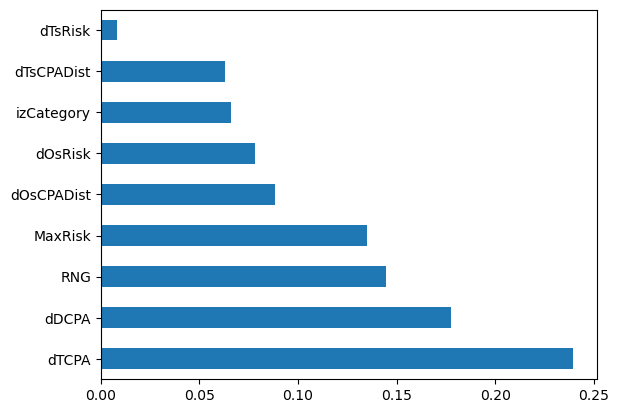

In [112]:
feat_importances = pd.Series(clf.feature_importances_, index=train_ecs.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [59]:
'''
위치 경도 좌표 제거 o 
'''
# 비지도 학습 전 전처리 (dtype object remove)
sample_size = round(len(ecs)*0.5)  # 2:1 비율
x_train = collison.sample(n = sample_size, random_state = 42)

# collison feature 선별
x_train = x_train[['dOsCPADist','dTsCPADist', 'dOsRisk', 'dTsCPADist', 'dTsRisk',
                 'izCategory','dDCPA', 'dTCPA', 'RNG', 'MaxRisk']]
x_train.reset_index(drop = True, inplace = True)


x_train.to_csv('test1.csv')


/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.64372 | train_accuracy: 0.37092 | valid_accuracy: 0.34218 |  0:00:00s
epoch 1  | loss: 1.18977 | train_accuracy: 0.45595 | valid_accuracy: 0.43537 |  0:00:00s
epoch 2  | loss: 1.08933 | train_accuracy: 0.45612 | valid_accuracy: 0.41769 |  0:00:00s
epoch 3  | loss: 1.01931 | train_accuracy: 0.4267  | valid_accuracy: 0.3932  |  0:00:00s
epoch 4  | loss: 0.97044 | train_accuracy: 0.37993 | valid_accuracy: 0.36803 |  0:00:00s
epoch 5  | loss: 0.95161 | train_accuracy: 0.36616 | valid_accuracy: 0.36803 |  0:00:00s
epoch 6  | loss: 0.94008 | train_accuracy: 0.41854 | valid_accuracy: 0.43061 |  0:00:00s
epoch 7  | loss: 0.92132 | train_accuracy: 0.42874 | valid_accuracy: 0.44898 |  0:00:00s
epoch 8  | loss: 0.89409 | train_accuracy: 0.44439 | valid_accuracy: 0.45442 |  0:00:00s
epoch 9  | loss: 0.90106 | train_accuracy: 0.44796 | valid_accuracy: 0.46054 |  0:00:01s
epoch 10 | loss: 0.88269 | train_accuracy: 0.38622 | valid_accuracy: 0.4034  |  0:00:01s
epoch 11 | loss: 0.88

epoch 95 | loss: 0.71583 | train_accuracy: 0.69218 | valid_accuracy: 0.65306 |  0:00:09s
epoch 96 | loss: 0.71987 | train_accuracy: 0.69915 | valid_accuracy: 0.66939 |  0:00:09s
epoch 97 | loss: 0.71025 | train_accuracy: 0.68452 | valid_accuracy: 0.65782 |  0:00:09s
epoch 98 | loss: 0.71131 | train_accuracy: 0.68078 | valid_accuracy: 0.65442 |  0:00:09s
epoch 99 | loss: 0.71572 | train_accuracy: 0.67857 | valid_accuracy: 0.65306 |  0:00:09s
epoch 100| loss: 0.70531 | train_accuracy: 0.70204 | valid_accuracy: 0.67143 |  0:00:09s
epoch 101| loss: 0.72718 | train_accuracy: 0.69507 | valid_accuracy: 0.66735 |  0:00:09s
epoch 102| loss: 0.70858 | train_accuracy: 0.69218 | valid_accuracy: 0.66531 |  0:00:09s
epoch 103| loss: 0.69601 | train_accuracy: 0.70221 | valid_accuracy: 0.66395 |  0:00:09s
epoch 104| loss: 0.70941 | train_accuracy: 0.70272 | valid_accuracy: 0.66803 |  0:00:09s
epoch 105| loss: 0.70162 | train_accuracy: 0.69405 | valid_accuracy: 0.6619  |  0:00:10s
epoch 106| loss: 0.71

epoch 189| loss: 0.66191 | train_accuracy: 0.72908 | valid_accuracy: 0.68912 |  0:00:17s
epoch 190| loss: 0.65854 | train_accuracy: 0.72126 | valid_accuracy: 0.68571 |  0:00:18s
epoch 191| loss: 0.64858 | train_accuracy: 0.73044 | valid_accuracy: 0.69252 |  0:00:18s
epoch 192| loss: 0.65185 | train_accuracy: 0.73384 | valid_accuracy: 0.69388 |  0:00:18s
epoch 193| loss: 0.64637 | train_accuracy: 0.7216  | valid_accuracy: 0.69592 |  0:00:18s
epoch 194| loss: 0.64307 | train_accuracy: 0.72024 | valid_accuracy: 0.69252 |  0:00:18s
epoch 195| loss: 0.65447 | train_accuracy: 0.72279 | valid_accuracy: 0.69524 |  0:00:18s
epoch 196| loss: 0.66755 | train_accuracy: 0.73605 | valid_accuracy: 0.69524 |  0:00:18s
epoch 197| loss: 0.66858 | train_accuracy: 0.72891 | valid_accuracy: 0.68844 |  0:00:18s
epoch 198| loss: 0.65681 | train_accuracy: 0.72704 | valid_accuracy: 0.68844 |  0:00:18s
epoch 199| loss: 0.65341 | train_accuracy: 0.73793 | valid_accuracy: 0.6898  |  0:00:18s
epoch 200| loss: 0.66

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 1  | loss: 1.1768  | train_accuracy: 0.28963 | valid_accuracy: 0.27891 |  0:00:00s
epoch 2  | loss: 1.11681 | train_accuracy: 0.2881  | valid_accuracy: 0.25918 |  0:00:00s
epoch 3  | loss: 1.0667  | train_accuracy: 0.30493 | valid_accuracy: 0.27891 |  0:00:00s
epoch 4  | loss: 1.0088  | train_accuracy: 0.32568 | valid_accuracy: 0.31361 |  0:00:00s
epoch 5  | loss: 0.97275 | train_accuracy: 0.3665  | valid_accuracy: 0.35646 |  0:00:00s
epoch 6  | loss: 0.9713  | train_accuracy: 0.33741 | valid_accuracy: 0.33673 |  0:00:00s
epoch 7  | loss: 0.96577 | train_accuracy: 0.36582 | valid_accuracy: 0.36054 |  0:00:00s
epoch 8  | loss: 0.93838 | train_accuracy: 0.38095 | valid_accuracy: 0.37755 |  0:00:00s
epoch 9  | loss: 0.92453 | train_accuracy: 0.40493 | valid_accuracy: 0.40136 |  0:00:00s
epoch 10 | loss: 0.91087 | train_accuracy: 0.45034 | valid_accuracy: 0.47959 |  0:00:01s
epoch 11 | loss: 0.90065 | train_accuracy: 0.39711 | valid_accuracy: 0.38095 |  0:00:01s
epoch 12 | loss: 0.90

epoch 96 | loss: 0.69854 | train_accuracy: 0.71037 | valid_accuracy: 0.69796 |  0:00:09s
epoch 97 | loss: 0.69285 | train_accuracy: 0.69762 | valid_accuracy: 0.68367 |  0:00:09s
epoch 98 | loss: 0.70149 | train_accuracy: 0.69983 | valid_accuracy: 0.68571 |  0:00:09s
epoch 99 | loss: 0.69521 | train_accuracy: 0.70425 | valid_accuracy: 0.70136 |  0:00:09s
epoch 100| loss: 0.70253 | train_accuracy: 0.69881 | valid_accuracy: 0.69388 |  0:00:09s
epoch 101| loss: 0.70697 | train_accuracy: 0.7     | valid_accuracy: 0.67619 |  0:00:09s
epoch 102| loss: 0.69415 | train_accuracy: 0.70748 | valid_accuracy: 0.69796 |  0:00:09s
epoch 103| loss: 0.68577 | train_accuracy: 0.69643 | valid_accuracy: 0.68231 |  0:00:09s
epoch 104| loss: 0.68628 | train_accuracy: 0.69626 | valid_accuracy: 0.6898  |  0:00:09s
epoch 105| loss: 0.68593 | train_accuracy: 0.70697 | valid_accuracy: 0.67551 |  0:00:10s
epoch 106| loss: 0.68091 | train_accuracy: 0.68214 | valid_accuracy: 0.67143 |  0:00:10s
epoch 107| loss: 0.69

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.63328 | train_accuracy: 0.31088 | valid_accuracy: 0.32925 |  0:00:00s
epoch 1  | loss: 1.1634  | train_accuracy: 0.32942 | valid_accuracy: 0.31837 |  0:00:00s
epoch 2  | loss: 1.05347 | train_accuracy: 0.34728 | valid_accuracy: 0.32721 |  0:00:00s
epoch 3  | loss: 1.00929 | train_accuracy: 0.38673 | valid_accuracy: 0.36871 |  0:00:00s
epoch 4  | loss: 0.9748  | train_accuracy: 0.3915  | valid_accuracy: 0.38027 |  0:00:00s
epoch 5  | loss: 0.95653 | train_accuracy: 0.4818  | valid_accuracy: 0.50068 |  0:00:00s
epoch 6  | loss: 0.93961 | train_accuracy: 0.49116 | valid_accuracy: 0.50748 |  0:00:00s
epoch 7  | loss: 0.92453 | train_accuracy: 0.49898 | valid_accuracy: 0.51156 |  0:00:00s
epoch 8  | loss: 0.92116 | train_accuracy: 0.39218 | valid_accuracy: 0.43129 |  0:00:00s
epoch 9  | loss: 0.92749 | train_accuracy: 0.5131  | valid_accuracy: 0.5449  |  0:00:00s
epoch 10 | loss: 0.91544 | train_accuracy: 0.44813 | valid_accuracy: 0.48027 |  0:00:01s
epoch 11 | loss: 0.91

epoch 95 | loss: 0.72378 | train_accuracy: 0.68452 | valid_accuracy: 0.66939 |  0:00:09s
epoch 96 | loss: 0.73597 | train_accuracy: 0.69133 | valid_accuracy: 0.67755 |  0:00:09s
epoch 97 | loss: 0.72877 | train_accuracy: 0.68316 | valid_accuracy: 0.67551 |  0:00:09s
epoch 98 | loss: 0.72994 | train_accuracy: 0.68095 | valid_accuracy: 0.66667 |  0:00:09s
epoch 99 | loss: 0.73126 | train_accuracy: 0.68078 | valid_accuracy: 0.67007 |  0:00:09s
epoch 100| loss: 0.72379 | train_accuracy: 0.67806 | valid_accuracy: 0.66871 |  0:00:09s
epoch 101| loss: 0.71546 | train_accuracy: 0.69728 | valid_accuracy: 0.67279 |  0:00:09s
epoch 102| loss: 0.72084 | train_accuracy: 0.69337 | valid_accuracy: 0.66871 |  0:00:09s
epoch 103| loss: 0.71907 | train_accuracy: 0.68656 | valid_accuracy: 0.65714 |  0:00:09s
epoch 104| loss: 0.72024 | train_accuracy: 0.68861 | valid_accuracy: 0.68027 |  0:00:09s
epoch 105| loss: 0.72881 | train_accuracy: 0.69473 | valid_accuracy: 0.67075 |  0:00:09s
epoch 106| loss: 0.71

epoch 188| loss: 0.68419 | train_accuracy: 0.72687 | valid_accuracy: 0.69524 |  0:00:17s
epoch 189| loss: 0.67067 | train_accuracy: 0.7216  | valid_accuracy: 0.69388 |  0:00:17s
epoch 190| loss: 0.67456 | train_accuracy: 0.72857 | valid_accuracy: 0.70544 |  0:00:18s
epoch 191| loss: 0.65541 | train_accuracy: 0.72466 | valid_accuracy: 0.70272 |  0:00:18s
epoch 192| loss: 0.66493 | train_accuracy: 0.72636 | valid_accuracy: 0.70476 |  0:00:18s
epoch 193| loss: 0.66509 | train_accuracy: 0.72483 | valid_accuracy: 0.70816 |  0:00:18s
epoch 194| loss: 0.67433 | train_accuracy: 0.72908 | valid_accuracy: 0.71088 |  0:00:18s
epoch 195| loss: 0.66063 | train_accuracy: 0.73095 | valid_accuracy: 0.70136 |  0:00:18s
epoch 196| loss: 0.66502 | train_accuracy: 0.72653 | valid_accuracy: 0.69252 |  0:00:18s
epoch 197| loss: 0.67643 | train_accuracy: 0.72262 | valid_accuracy: 0.70136 |  0:00:18s
epoch 198| loss: 0.65234 | train_accuracy: 0.72687 | valid_accuracy: 0.70476 |  0:00:18s
epoch 199| loss: 0.66

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.6219  | train_accuracy: 0.33588 | valid_accuracy: 0.33401 |  0:00:00s
epoch 1  | loss: 1.16128 | train_accuracy: 0.31582 | valid_accuracy: 0.31769 |  0:00:00s
epoch 2  | loss: 1.05408 | train_accuracy: 0.2949  | valid_accuracy: 0.30068 |  0:00:00s
epoch 3  | loss: 0.99992 | train_accuracy: 0.37092 | valid_accuracy: 0.35442 |  0:00:00s
epoch 4  | loss: 0.96247 | train_accuracy: 0.34762 | valid_accuracy: 0.3483  |  0:00:00s
epoch 5  | loss: 0.95919 | train_accuracy: 0.37177 | valid_accuracy: 0.36395 |  0:00:00s
epoch 6  | loss: 0.92373 | train_accuracy: 0.46616 | valid_accuracy: 0.45918 |  0:00:00s
epoch 7  | loss: 0.91329 | train_accuracy: 0.53163 | valid_accuracy: 0.51701 |  0:00:00s
epoch 8  | loss: 0.90408 | train_accuracy: 0.49558 | valid_accuracy: 0.48299 |  0:00:00s
epoch 9  | loss: 0.87807 | train_accuracy: 0.40391 | valid_accuracy: 0.41156 |  0:00:00s
epoch 10 | loss: 0.88828 | train_accuracy: 0.39422 | valid_accuracy: 0.40476 |  0:00:01s
epoch 11 | loss: 0.87

epoch 95 | loss: 0.71226 | train_accuracy: 0.6983  | valid_accuracy: 0.66531 |  0:00:09s
epoch 96 | loss: 0.71646 | train_accuracy: 0.70119 | valid_accuracy: 0.64626 |  0:00:09s
epoch 97 | loss: 0.71079 | train_accuracy: 0.7017  | valid_accuracy: 0.6585  |  0:00:09s
epoch 98 | loss: 0.70677 | train_accuracy: 0.69881 | valid_accuracy: 0.66259 |  0:00:09s
epoch 99 | loss: 0.70854 | train_accuracy: 0.70799 | valid_accuracy: 0.65986 |  0:00:09s
epoch 100| loss: 0.69734 | train_accuracy: 0.70714 | valid_accuracy: 0.67007 |  0:00:09s
epoch 101| loss: 0.69255 | train_accuracy: 0.70527 | valid_accuracy: 0.66735 |  0:00:09s
epoch 102| loss: 0.70392 | train_accuracy: 0.70187 | valid_accuracy: 0.66463 |  0:00:09s
epoch 103| loss: 0.69382 | train_accuracy: 0.70595 | valid_accuracy: 0.65918 |  0:00:09s
epoch 104| loss: 0.69596 | train_accuracy: 0.70714 | valid_accuracy: 0.66803 |  0:00:09s
epoch 105| loss: 0.70403 | train_accuracy: 0.70714 | valid_accuracy: 0.66395 |  0:00:09s
epoch 106| loss: 0.68

epoch 190| loss: 0.63957 | train_accuracy: 0.75102 | valid_accuracy: 0.70612 |  0:00:17s
epoch 191| loss: 0.64267 | train_accuracy: 0.76173 | valid_accuracy: 0.72517 |  0:00:18s
epoch 192| loss: 0.64347 | train_accuracy: 0.75085 | valid_accuracy: 0.71361 |  0:00:18s
epoch 193| loss: 0.63297 | train_accuracy: 0.75357 | valid_accuracy: 0.71361 |  0:00:18s
epoch 194| loss: 0.63961 | train_accuracy: 0.74711 | valid_accuracy: 0.69864 |  0:00:18s
epoch 195| loss: 0.6404  | train_accuracy: 0.7466  | valid_accuracy: 0.6966  |  0:00:18s
epoch 196| loss: 0.63606 | train_accuracy: 0.75544 | valid_accuracy: 0.71224 |  0:00:18s
epoch 197| loss: 0.63664 | train_accuracy: 0.75816 | valid_accuracy: 0.71156 |  0:00:18s
epoch 198| loss: 0.63927 | train_accuracy: 0.76037 | valid_accuracy: 0.71293 |  0:00:18s
epoch 199| loss: 0.62694 | train_accuracy: 0.7551  | valid_accuracy: 0.7068  |  0:00:18s
epoch 200| loss: 0.62261 | train_accuracy: 0.74847 | valid_accuracy: 0.7034  |  0:00:18s
epoch 201| loss: 0.64

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:118: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 1.70919 | train_accuracy: 0.35629 | valid_accuracy: 0.35578 |  0:00:00s
epoch 1  | loss: 1.22248 | train_accuracy: 0.38673 | valid_accuracy: 0.38095 |  0:00:00s
epoch 2  | loss: 1.09514 | train_accuracy: 0.38299 | valid_accuracy: 0.36395 |  0:00:00s
epoch 3  | loss: 1.03716 | train_accuracy: 0.40731 | valid_accuracy: 0.40612 |  0:00:00s
epoch 4  | loss: 0.99247 | train_accuracy: 0.41769 | valid_accuracy: 0.41156 |  0:00:00s
epoch 5  | loss: 0.97343 | train_accuracy: 0.42534 | valid_accuracy: 0.44082 |  0:00:00s
epoch 6  | loss: 0.94536 | train_accuracy: 0.4835  | valid_accuracy: 0.50816 |  0:00:00s
epoch 7  | loss: 0.93648 | train_accuracy: 0.48027 | valid_accuracy: 0.51633 |  0:00:00s
epoch 8  | loss: 0.9163  | train_accuracy: 0.52075 | valid_accuracy: 0.54014 |  0:00:00s
epoch 9  | loss: 0.90844 | train_accuracy: 0.49779 | valid_accuracy: 0.52313 |  0:00:00s
epoch 10 | loss: 0.90103 | train_accuracy: 0.47789 | valid_accuracy: 0.49456 |  0:00:01s
epoch 11 | loss: 0.89

epoch 95 | loss: 0.72849 | train_accuracy: 0.6869  | valid_accuracy: 0.67483 |  0:00:09s
epoch 96 | loss: 0.72823 | train_accuracy: 0.67364 | valid_accuracy: 0.67483 |  0:00:09s
epoch 97 | loss: 0.7028  | train_accuracy: 0.68793 | valid_accuracy: 0.6619  |  0:00:09s
epoch 98 | loss: 0.73194 | train_accuracy: 0.66224 | valid_accuracy: 0.65306 |  0:00:09s
epoch 99 | loss: 0.71242 | train_accuracy: 0.67874 | valid_accuracy: 0.69048 |  0:00:09s
epoch 100| loss: 0.71678 | train_accuracy: 0.67908 | valid_accuracy: 0.68571 |  0:00:09s
epoch 101| loss: 0.6995  | train_accuracy: 0.69235 | valid_accuracy: 0.69456 |  0:00:09s
epoch 102| loss: 0.69997 | train_accuracy: 0.70102 | valid_accuracy: 0.6966  |  0:00:09s
epoch 103| loss: 0.72596 | train_accuracy: 0.68963 | valid_accuracy: 0.68299 |  0:00:09s
epoch 104| loss: 0.70917 | train_accuracy: 0.68112 | valid_accuracy: 0.67347 |  0:00:09s
epoch 105| loss: 0.69873 | train_accuracy: 0.68741 | valid_accuracy: 0.66939 |  0:00:09s
epoch 106| loss: 0.70

/home/suresoft/anaconda3/envs/InternShelter/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


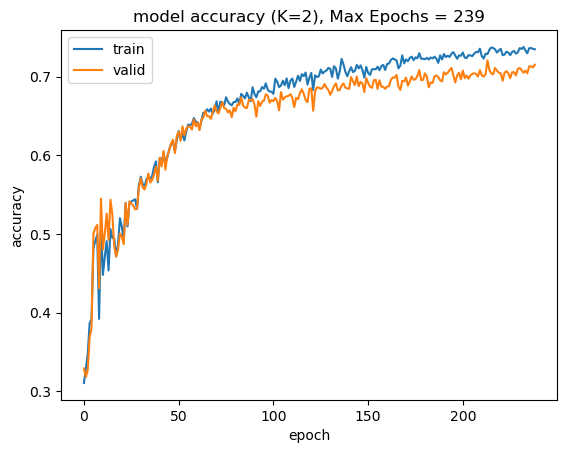

In [114]:
'''
Tabnet의 경우, epoch 가 일정하지 않기 때문에 loss 그래프의 평균을 알 수 없다.
따라서, epoch 수가 가장 많았을 때의 loss 그래프를 시각화 하였다.
'''
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 나누기 위한 K 설정
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

max_epochs = 0  # To track the maximum epoch count among all k-folds
max_epochs_idx = -1  # To track the index of the k-fold with the maximum epoch count

dict_train = {}
dict_val = {}

# K-fold 교차 검증 반복
for k, (train_idx, val_idx) in enumerate(kf.split(x_train_50)):
    X_train_fold, X_val_fold = x_train_50[train_idx], x_train_50[val_idx]
    y_train_fold, y_val_fold = y_train_50[train_idx], y_train_50[val_idx]
    
    # 모델 초기화
    clf = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=3e-2),
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='sparsemax'
    )

    # 모델 학습
    clf.fit(
        X_train=X_train_fold, y_train=y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=1000, patience=25,
        from_unsupervised=unsupervised_model
    )
    
    # Calculate the number of epochs
    num_epochs = len(clf.history['loss'])
    
    # Track the maximum epoch count and its index
    if num_epochs > max_epochs:
        max_epochs = num_epochs
        max_epochs_idx = k
    
    # fold 별 train, valid accuracy 저장
    dict_train[k] = clf.history['train_accuracy']
    dict_val[k] = clf.history['valid_accuracy']

    
# Plot the loss graph for the k-fold with the maximum epoch count
plt.plot(dict_train[max_epochs_idx], label='train')
plt.plot(dict_val[max_epochs_idx], label='valid')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.title(f'model accuracy (K={max_epochs_idx}), Max Epochs = {max_epochs}')
plt.legend(loc='upper left')
plt.show()
